# SURPRISE HOUSING ADVANCE REGRESSION ASSIGNMENT

## PROBLEM STATEMENT
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
# Importing libraries

# Basic libraries
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data modelling libraries 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Statistics
from scipy import stats
from scipy.stats import norm, skew 

# handling warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)

## READING AND UNDERSTANDING THE DATA

In [2]:
# Reading the data from csv file
housing_df=pd.read_csv("train.csv")

# Displaying first 5 rows
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# checking the no of rows and columns
print("Number of Rows = ", housing_df.shape[0])
print("Number of Columns = ", housing_df.shape[1])

Number of Rows =  1460
Number of Columns =  81


In [4]:
# Checking the info of the data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Describing the data for the numerical values
housing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
# Displaying the columns
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Displaying the categorical columns
housing_df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
# Displaying the numerical columns
housing_df.select_dtypes(exclude='object').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Data Cleaning

In [9]:
# Checking for null values in the data
housing_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
# Alley, PoolQC , Fence & MiscFeature has more than 1000 rows of NA in the data. 
# This indicates high bias in those columns and hence we can drop these columns.
# We can also remove Id column as it provides no predictive power.
housing_df.drop(['Id', 'Alley', 'PoolQC' , 'Fence' , 'MiscFeature'], axis=1, inplace=True)
housing_df.shape

(1460, 76)

🔎 Here we observe that some of the have null values. However, from the data definition it is observed that NA means different category in different columns. The below list contains the columns and the category interpretation for NA

- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 : NA = No Basement
- FireplaceQu : NA = No Fireplace
- GarageType, GarageFinish, GarageQual, GarageCond : NA = No Garage

In [11]:
# Filling all NA with None
cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'MasVnrType', 'GarageQual', 'GarageCond']
for col in cols:
    housing_df[col] = housing_df[col].fillna('None')

In [12]:
# Checking for null values in the new data
null = pd.DataFrame(round(housing_df.isnull().sum()/len(housing_df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

Null %
Features           
LotFrontage   17.74
GarageYrBlt    5.55
MasVnrArea     0.55
Electrical     0.07

In [13]:
# Imputing remaining null values
housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median(), inplace=True)
housing_df['MasVnrArea'].fillna(0, inplace=True)
housing_df['Electrical'].fillna(housing_df['Electrical'].mode()[0], inplace=True)
housing_df['GarageYrBlt'].fillna(housing_df['GarageYrBlt'].mode()[0], inplace = True)

In [14]:
# Checking for null values in the new data
null = pd.DataFrame(round(housing_df.isnull().sum()/len(housing_df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

Empty DataFrame
Columns: [Null %]
Index: []

In [15]:
# Finding unique value percentage to check bias in data.
for c in housing_df.columns:
    if housing_df[c].dtype == 'object' :
        print(housing_df[c].value_counts(normalize=True))

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: proportion, dtype: float64
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mit

#### 🔎 We can observe high bias in columns:
    - Street
    - Utilities
    - LandSlope
    - Condition2
    - RoofMatl
    - Heating
    - CentralAir
    - Electrical
    - Functional
    - PavedDrive 

In [16]:
# Dropping high bias columns:
housing_df.drop(['Street', 'Utilities', 'LandSlope' , 'Condition2' , 'RoofMatl', 'Heating', 'CentralAir', 'Electrical','Functional','PavedDrive'], axis=1, inplace=True)
housing_df.shape

(1460, 66)

In [17]:
# Checking the info for data types of the columns
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

🔎 From the above, we can see that MSSubClass, OverallCond, OverallQual needs to be converted to object.

In [18]:
# Convert three columns to 'object' type as mentioned above
housing_df[['MSSubClass', 'OverallQual', 'OverallCond']] = housing_df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [19]:
## Checking the datatypes of the above three columns
housing_df[['MSSubClass', 'OverallQual', 'OverallCond']].dtypes

MSSubClass     object
OverallQual    object
OverallCond    object
dtype: object

# Feature Engineering


In [20]:
# Building new columns
housing_df['House_Age'] = housing_df['YrSold'] - housing_df['YearBuilt']
housing_df['TotalSF'] = housing_df['1stFlrSF'] + housing_df['2ndFlrSF']

In [21]:
# Dropping YrSold, YearBuilt, 1stFlrSF, 2ndFlrSF
# we will also drop BsmtFinSF1 and BsmtUnfSF because TotalBsmtSF is the sum of the two. 
housing_df.drop(['YrSold', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF'], axis=1, inplace=True)
housing_df.shape

(1460, 62)

# EDA 

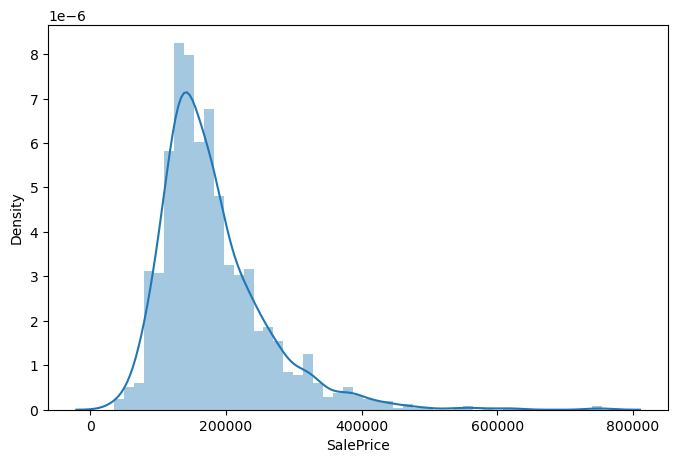

In [22]:
## 'SalePrice' distribution
plt.figure(figsize=[8,5])
sns.distplot(housing_df['SalePrice']);

**Observation:** Target Variable SalesPrice is highly right skewed. 

In [23]:
print("Skewness: ", housing_df['SalePrice'].skew())
print("Kurtosis: ", housing_df['SalePrice'].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


In [24]:
num_cols = housing_df.select_dtypes(exclude='object')
num_cols.columns

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2',
       'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice',
       'House_Age', 'TotalSF'],
      dtype='object')

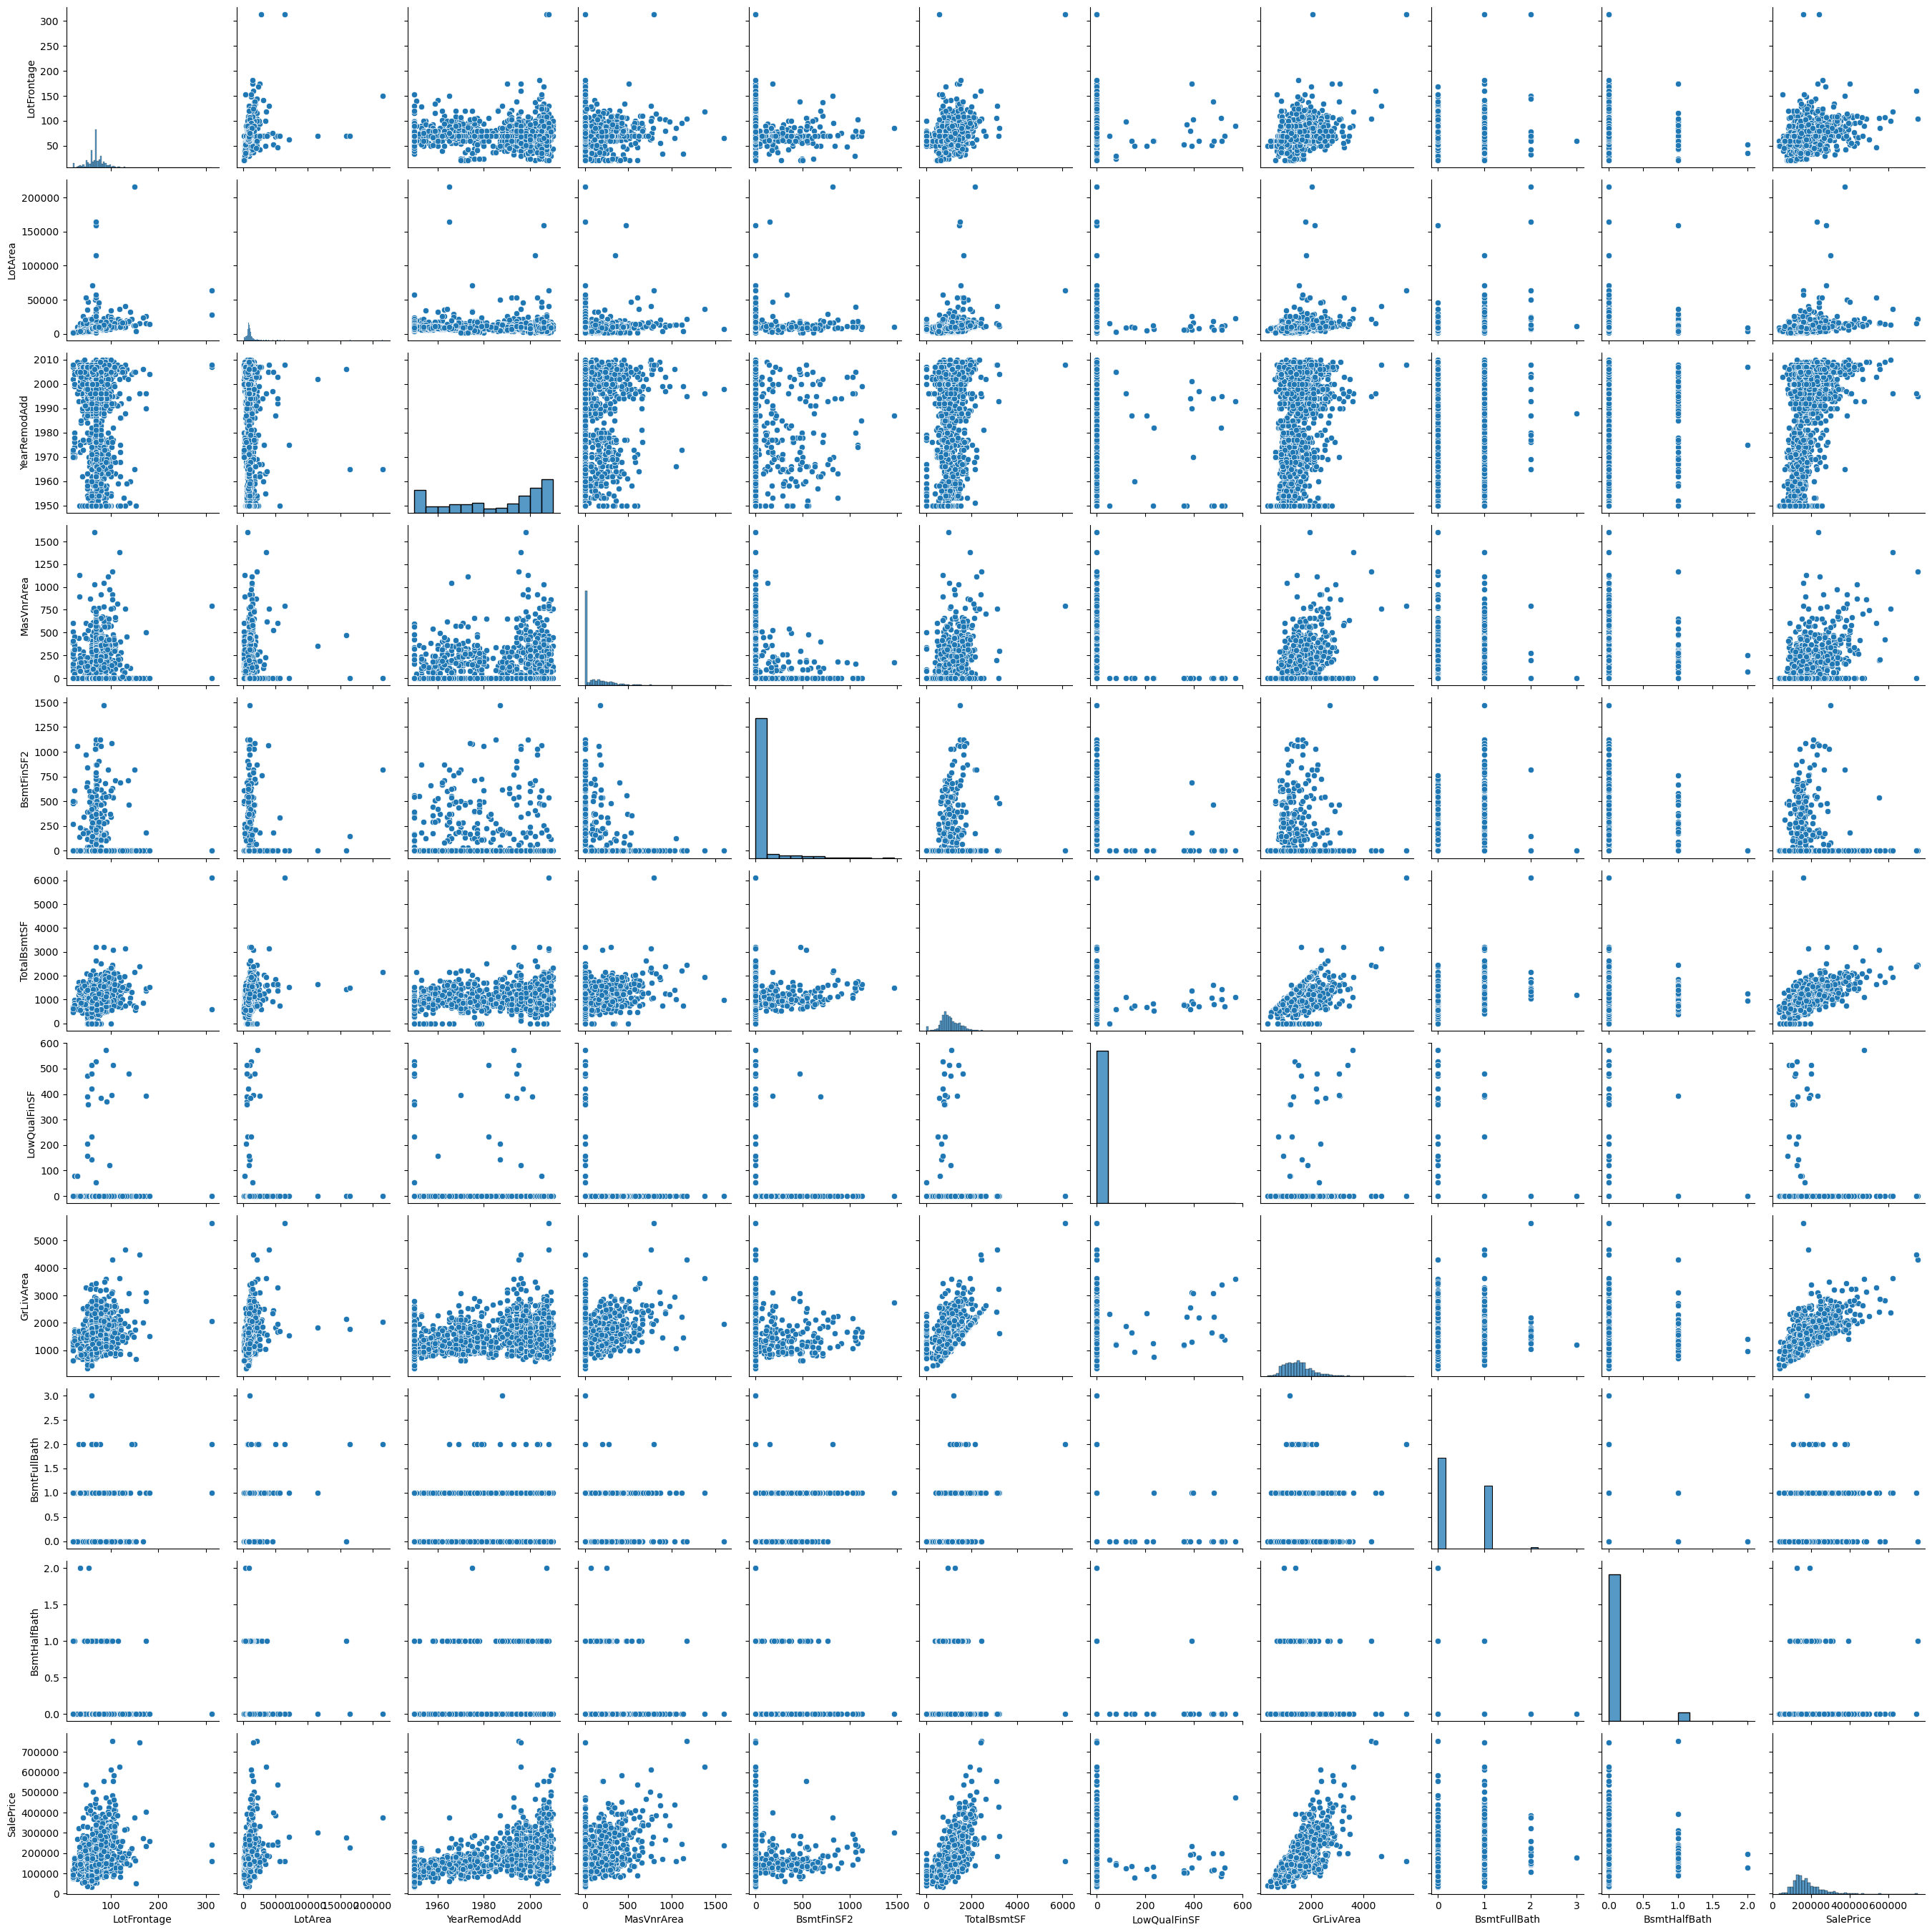

In [25]:
# Taking a pairplot for the numerical values
sub_num_cols1 = ['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2',
       'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'SalePrice']
sns.pairplot(housing_df[sub_num_cols1])

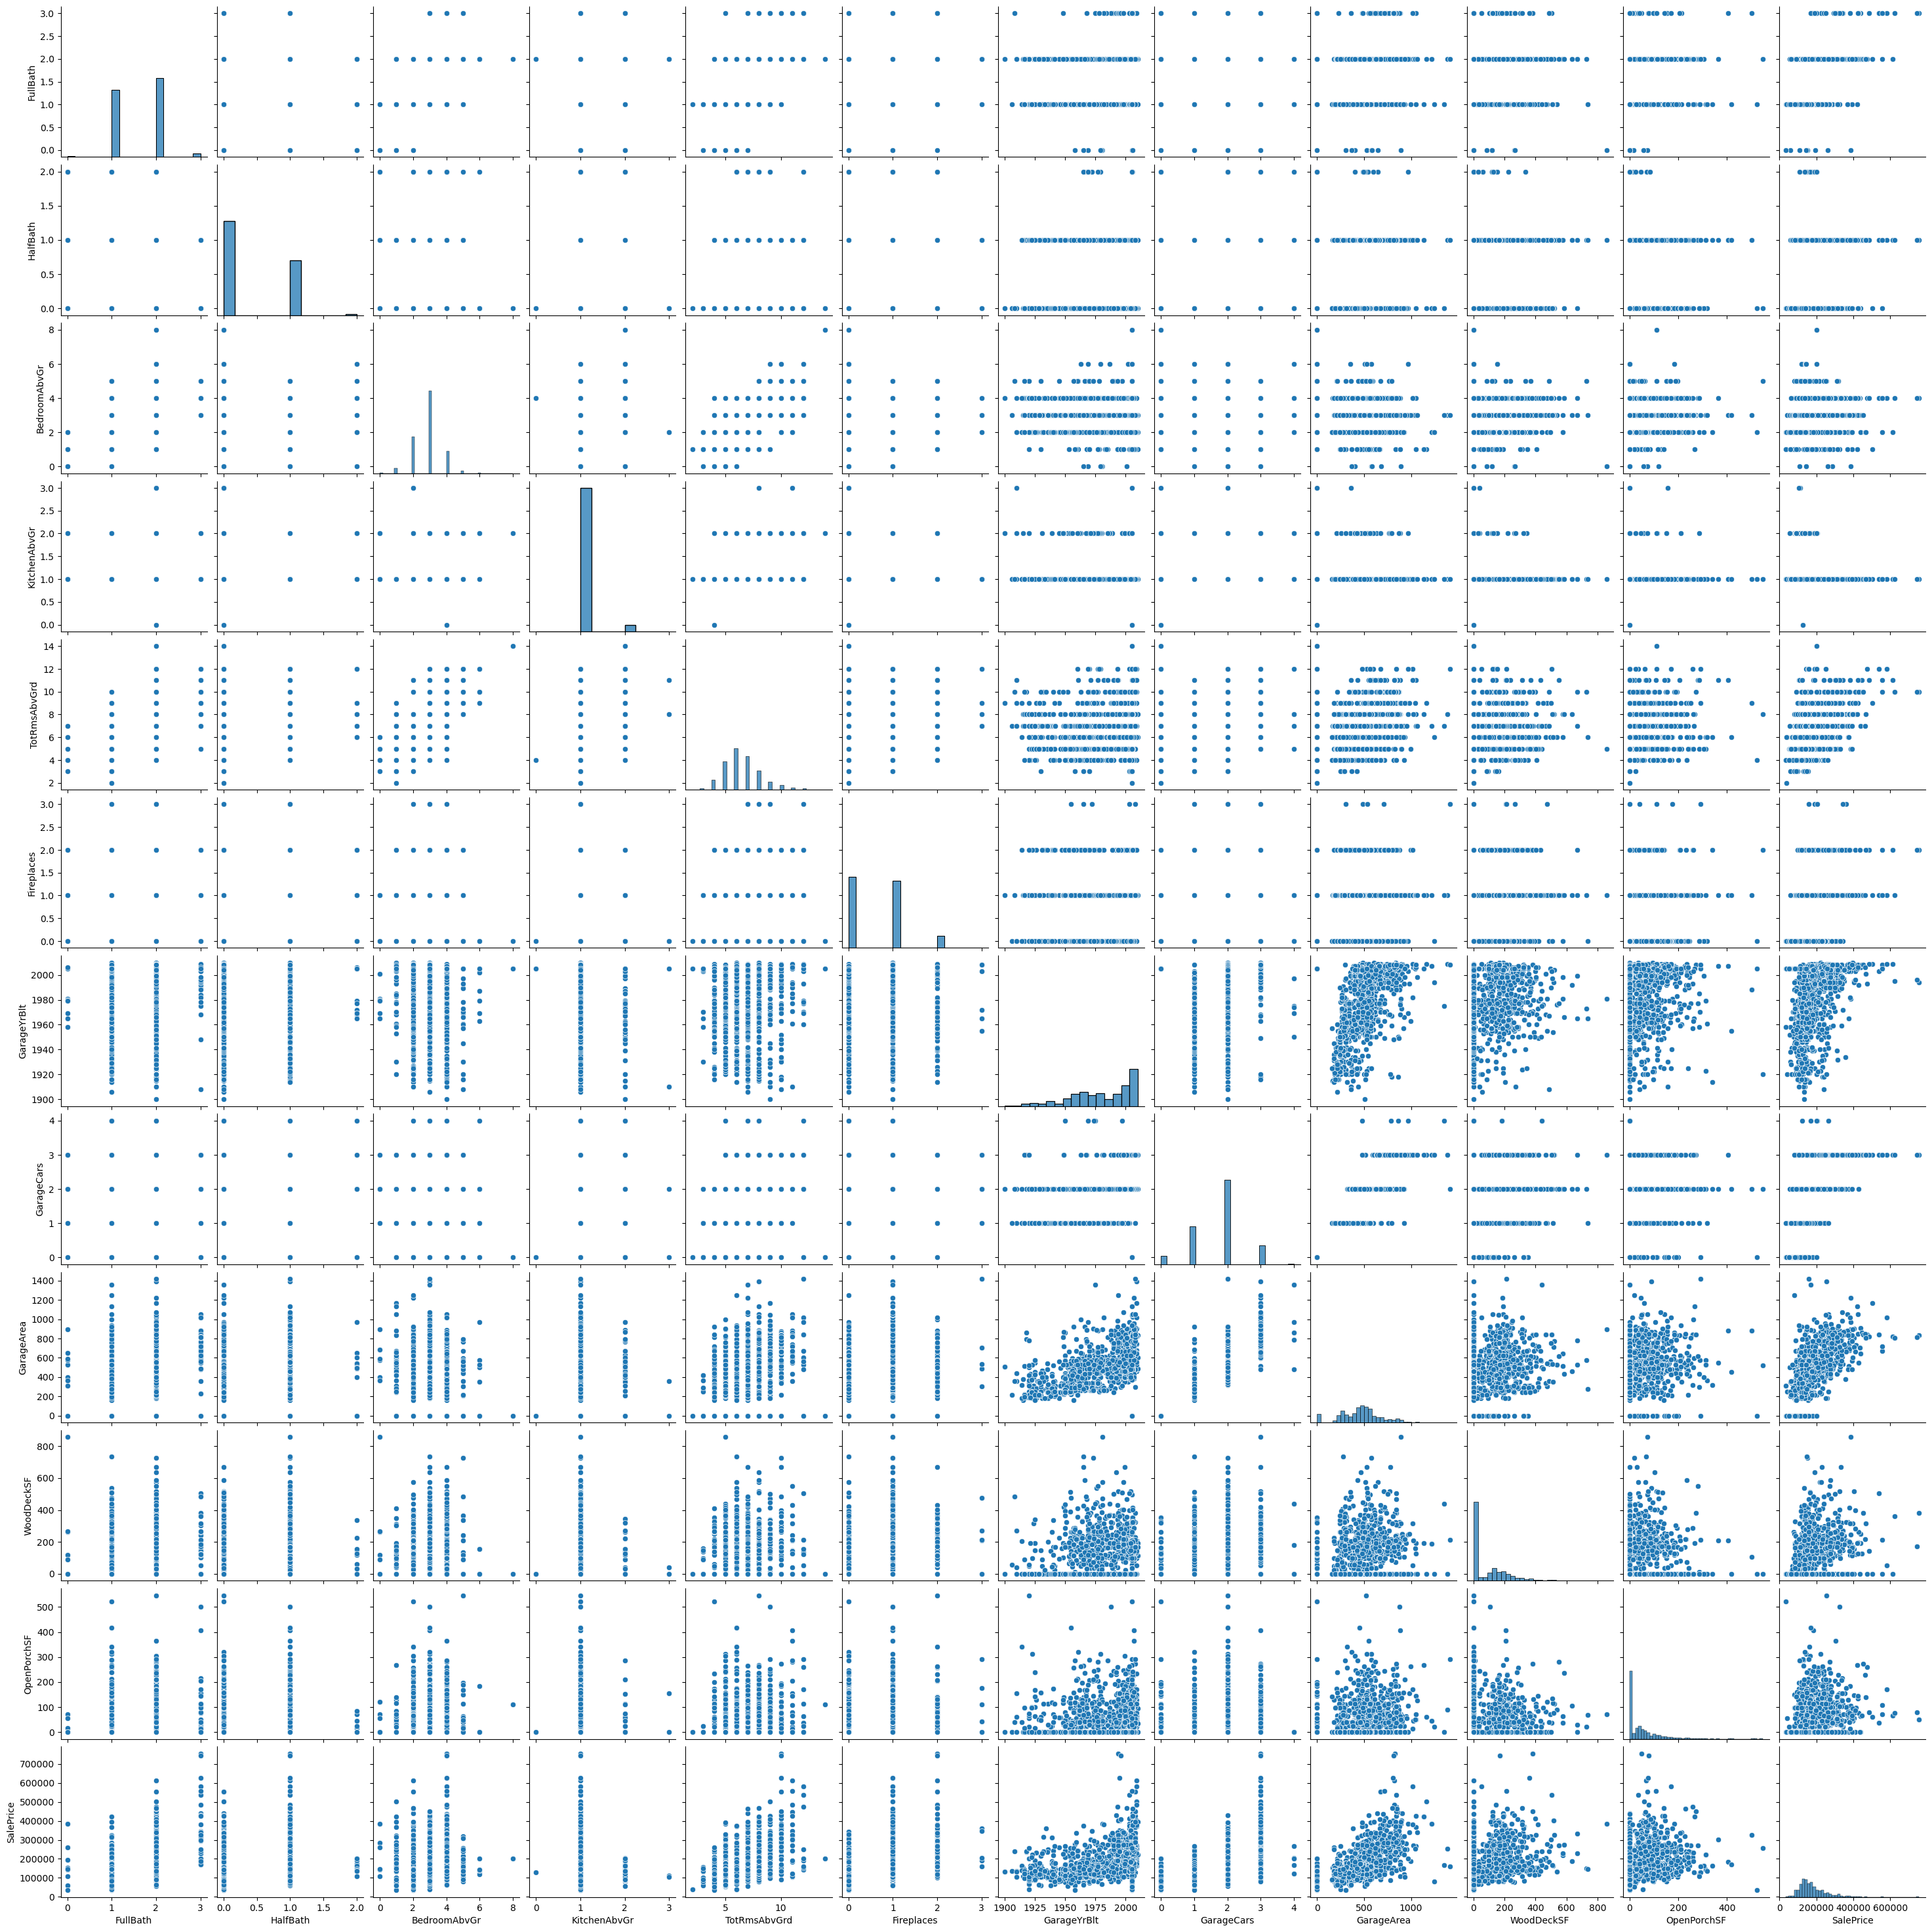

In [26]:
# Taking a pairplot for the numerical values
sub_num_cols2 = ['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice']
sns.pairplot(housing_df[sub_num_cols2])

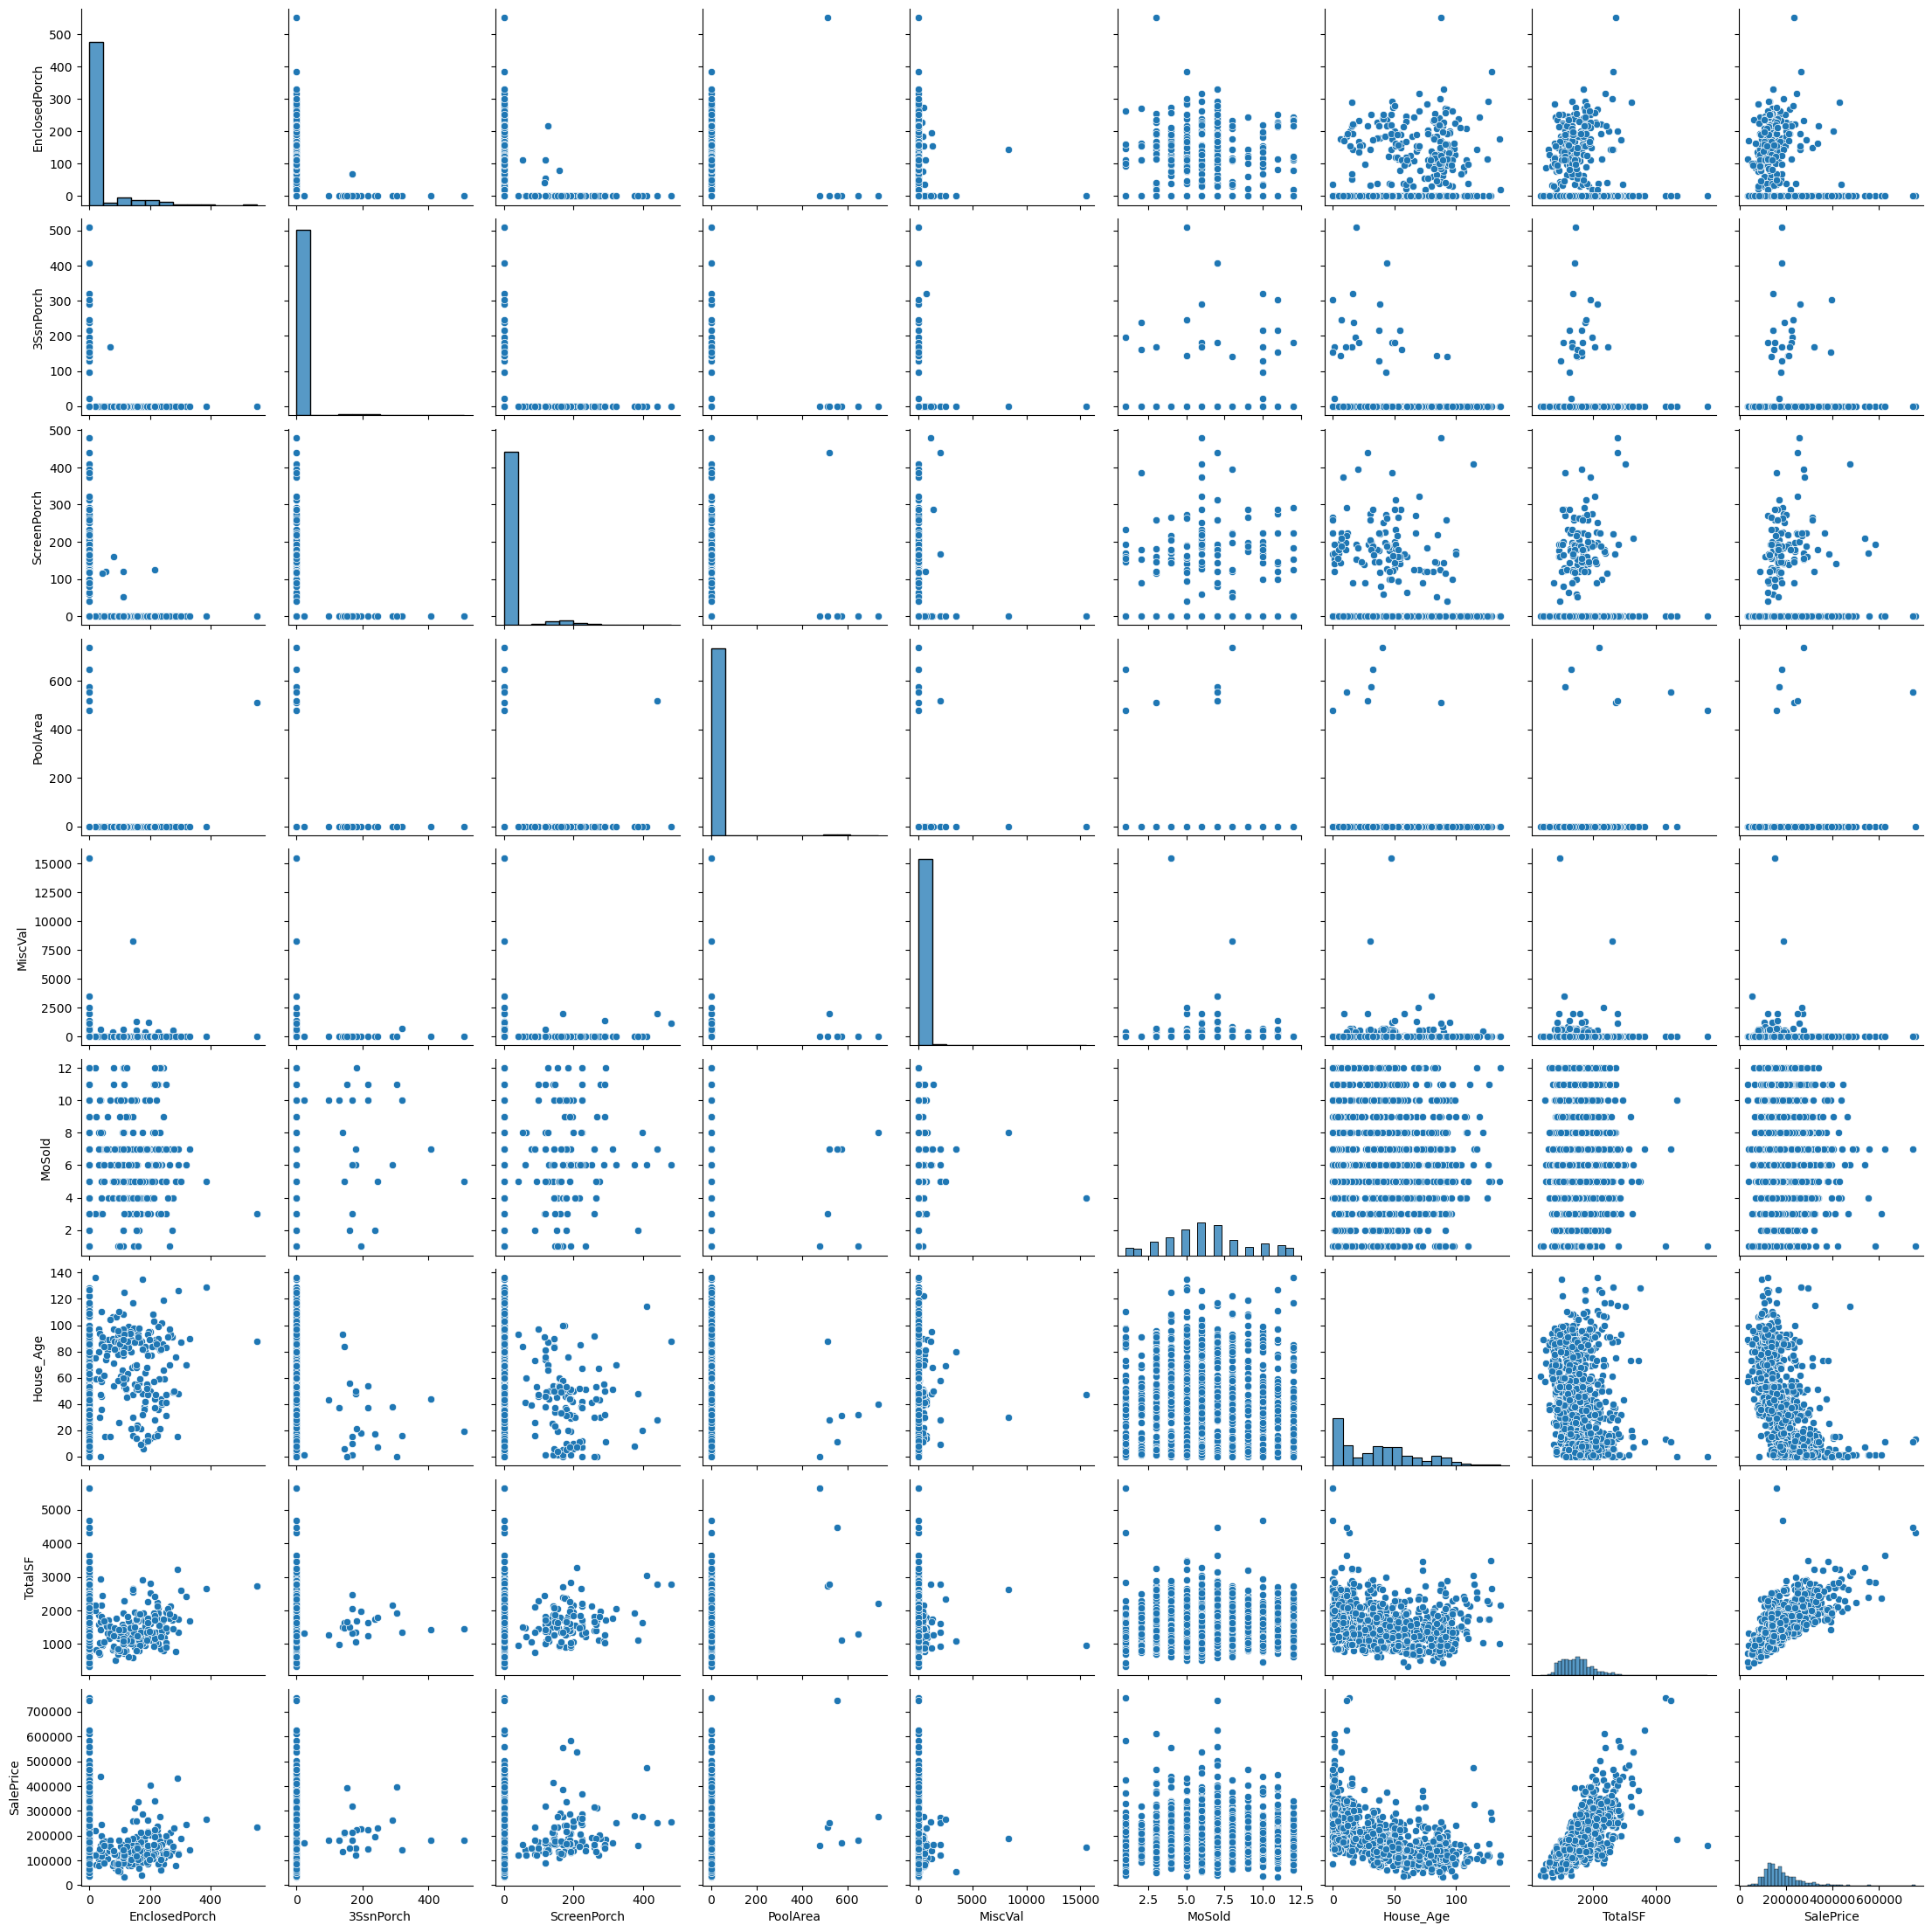

In [27]:
# Taking a pairplot for the numerical values
sub_num_cols3 = ['EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'House_Age', 'TotalSF', 'SalePrice']
sns.pairplot(housing_df[sub_num_cols3])

#### 🔎 **Observations:** 
    - SalePrice shows linear relationship with TotalBsmtSF, TotalSF, GrLivArea, TotRmsAbvGrd,GarageArea
    - SalesPrice increases with Garage car capacity, Number of Bathrooms, Bedroom Count,Number of Fireplaces, Overall Condition of the house
    - SalesPrice shows inverse linear relationship with House_age.

In [28]:
# Categorical Columns
cat_cols = housing_df.select_dtypes(include='object')
cat_cols.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition'],
      dtype='object')

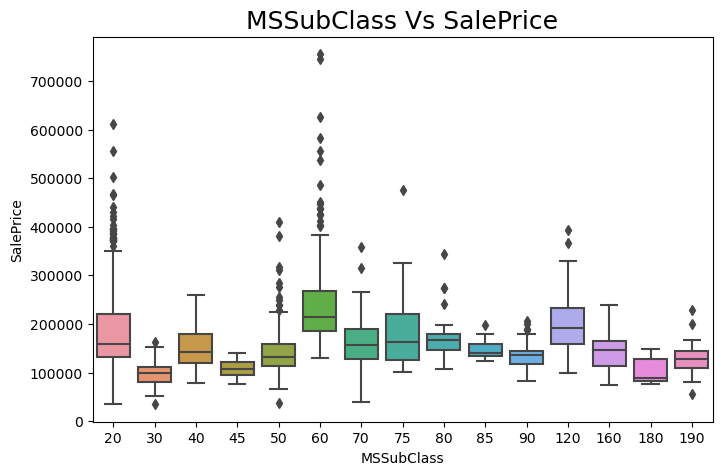

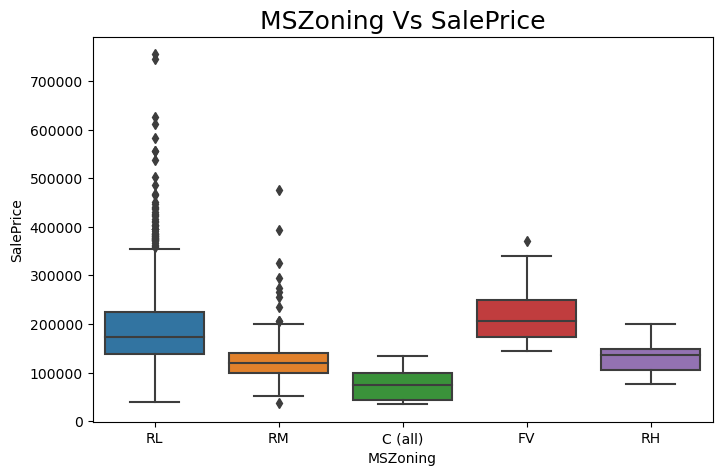

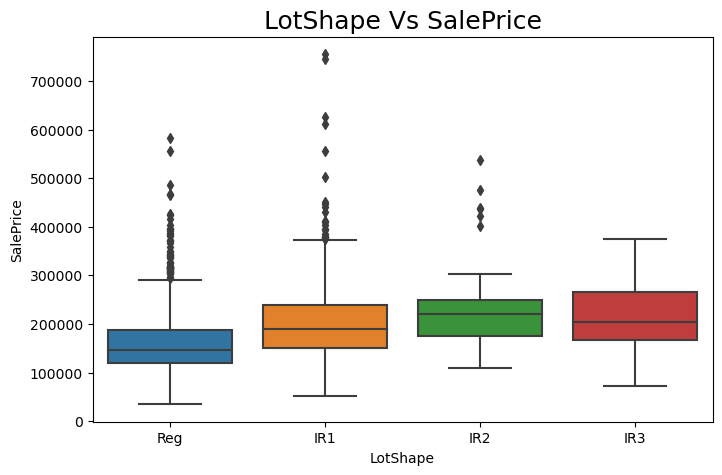

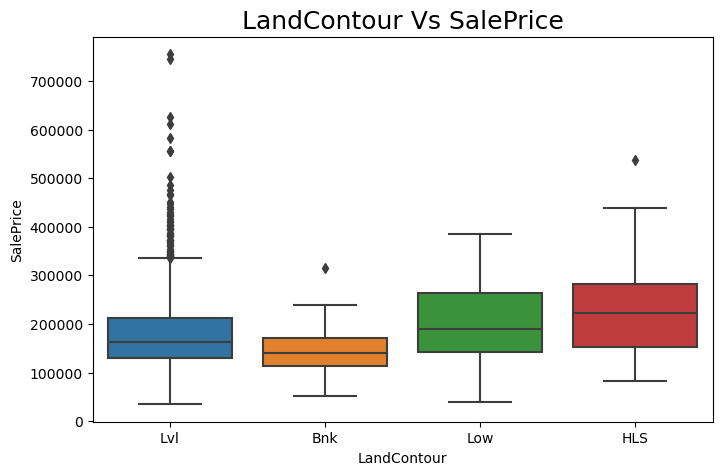

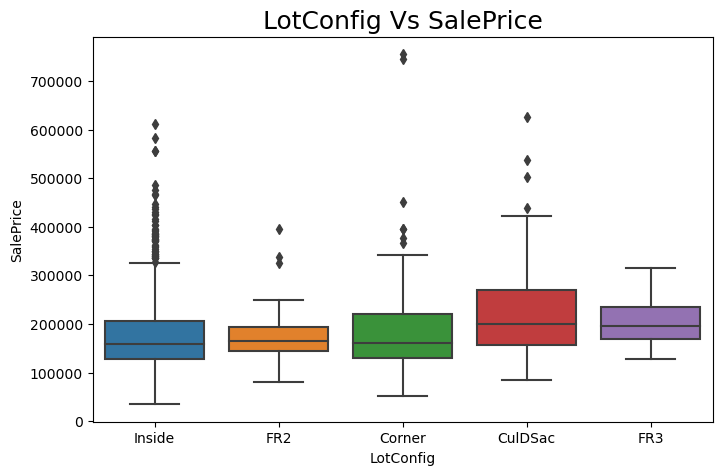

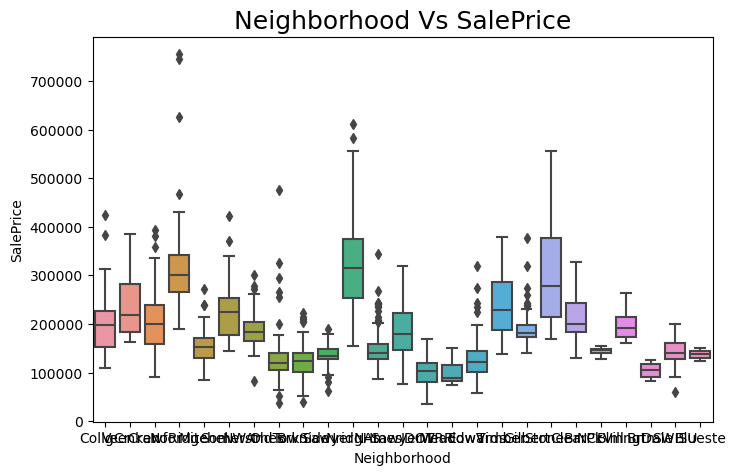

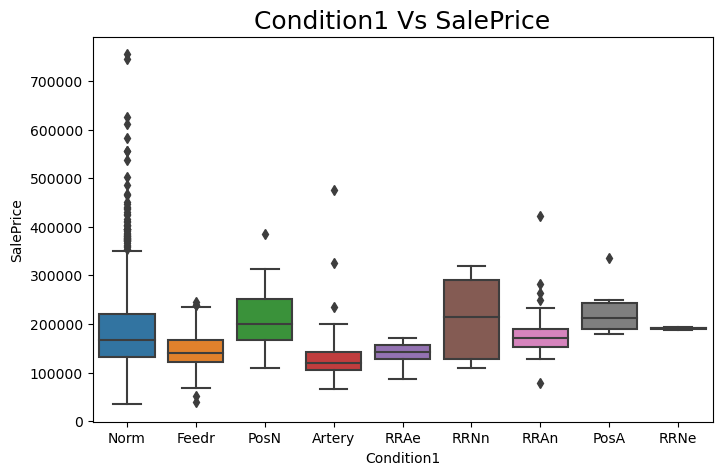

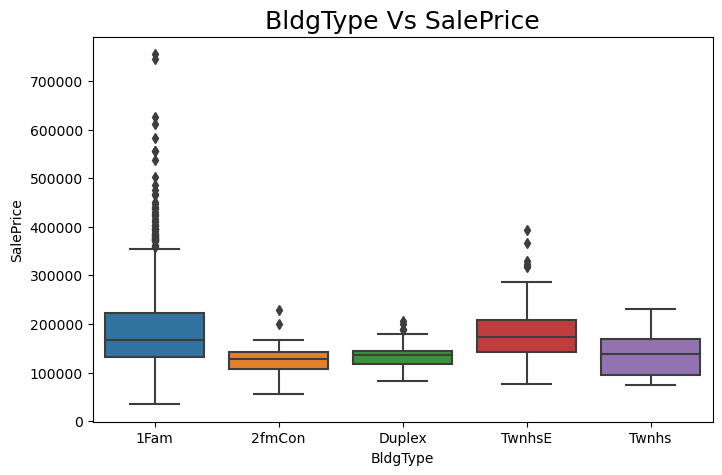

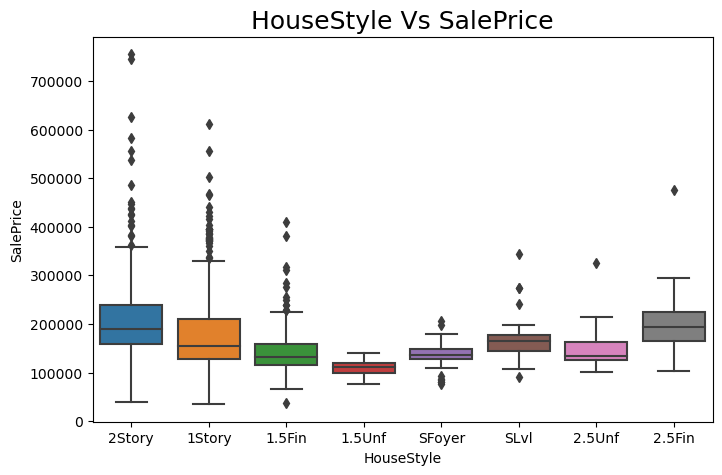

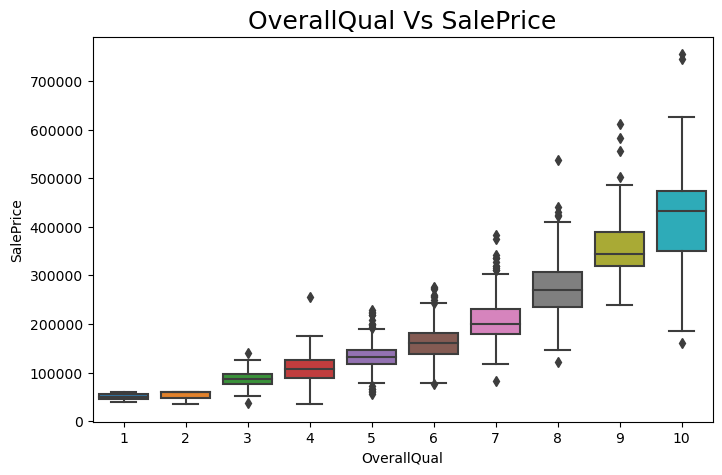

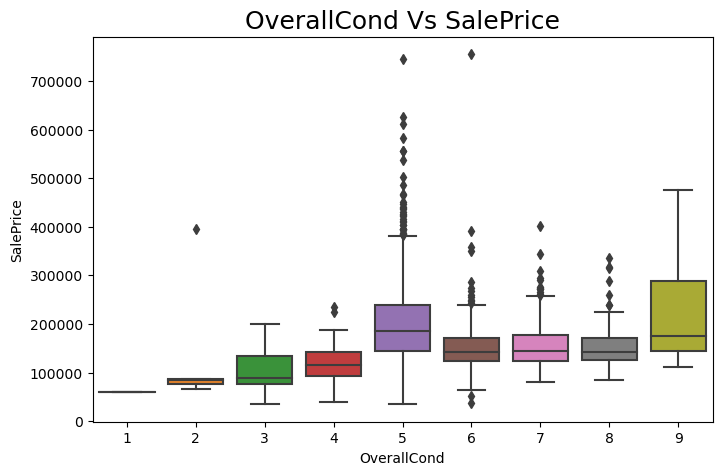

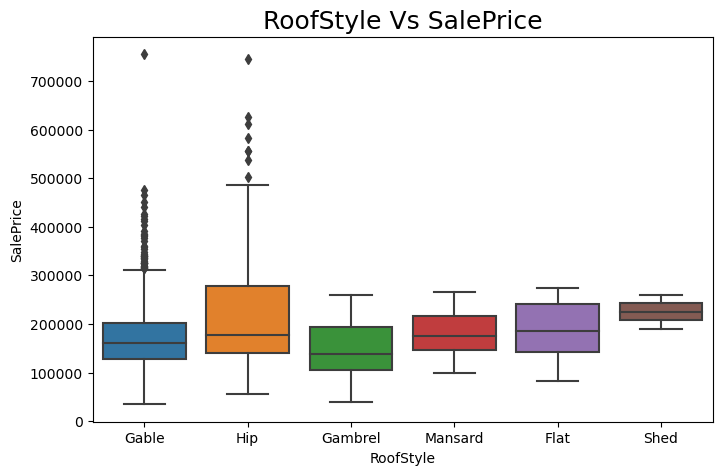

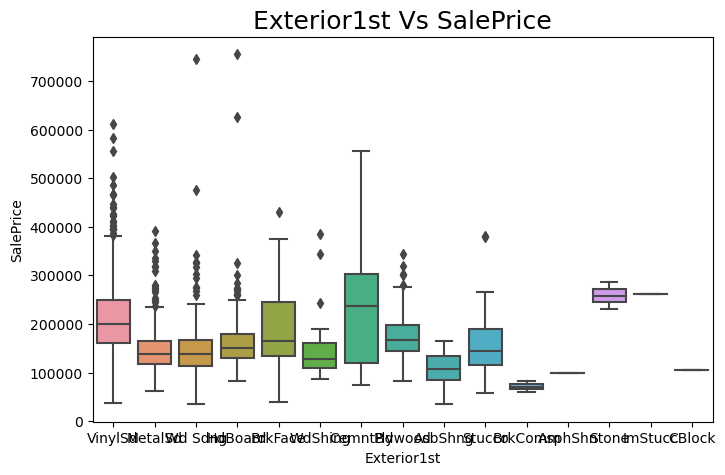

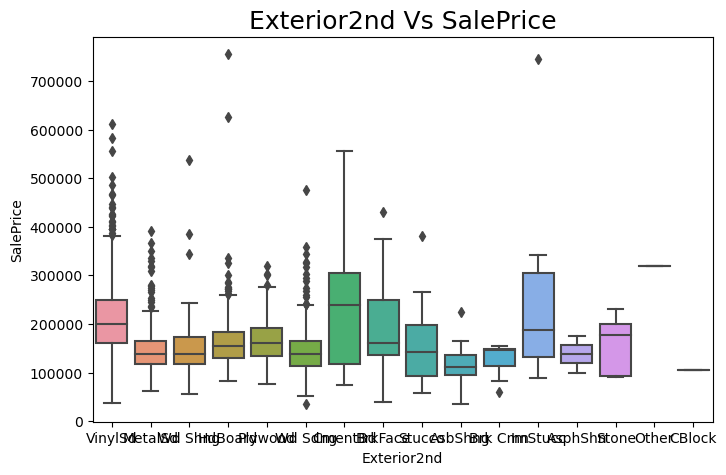

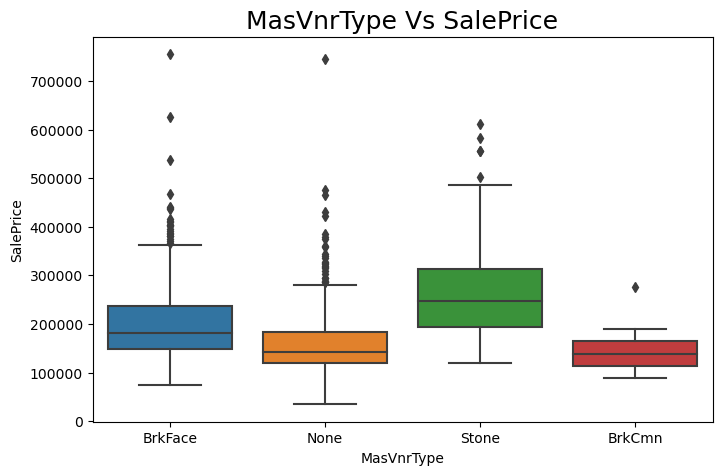

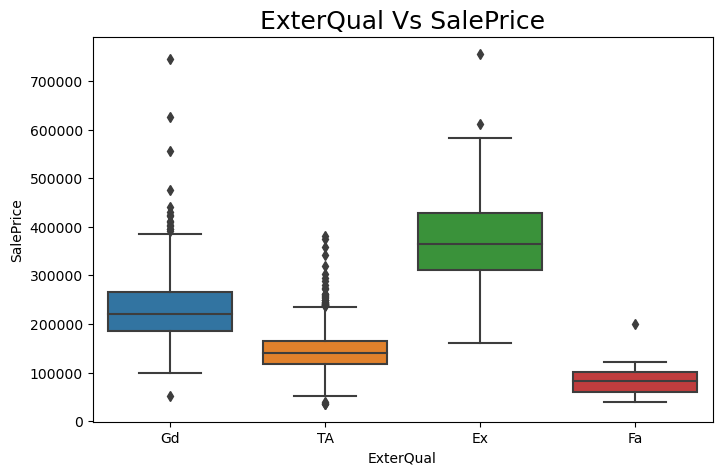

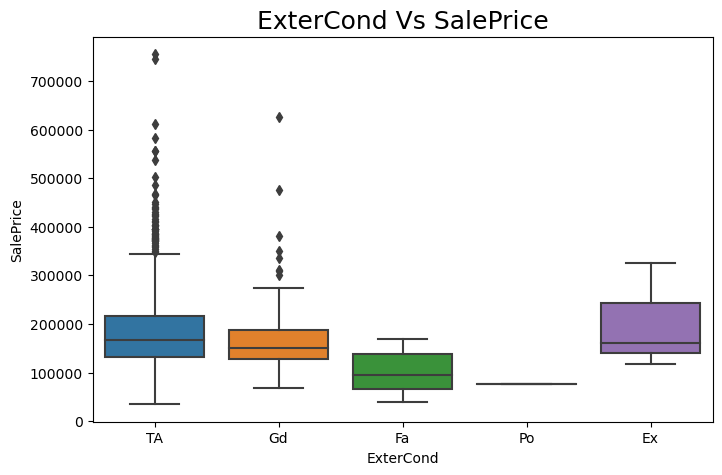

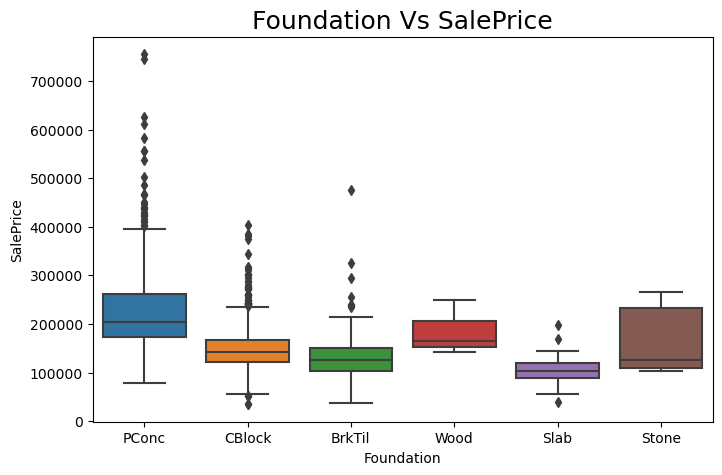

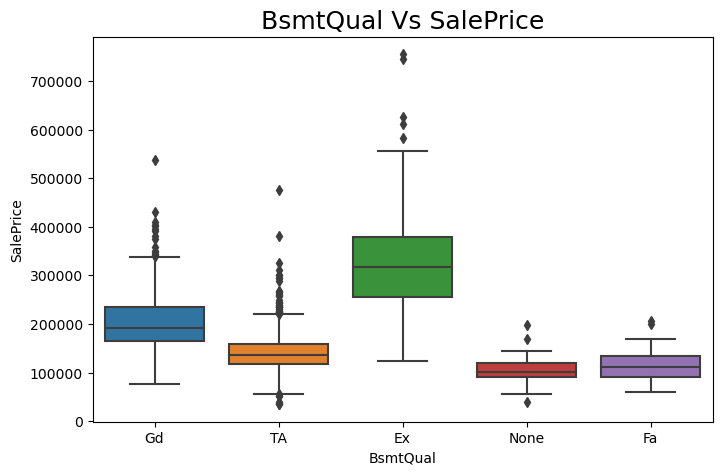

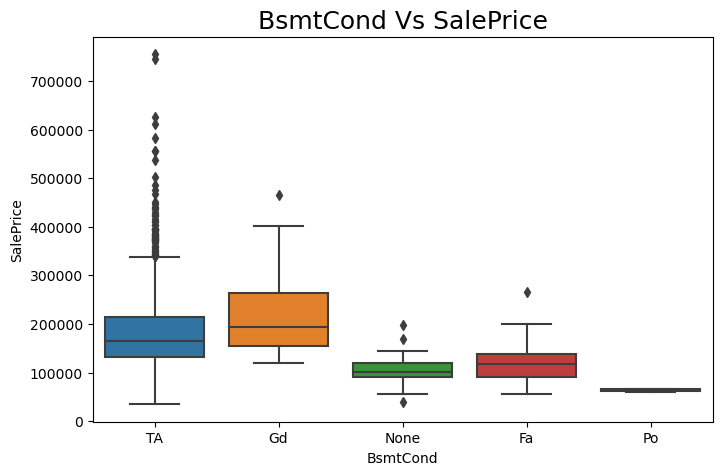

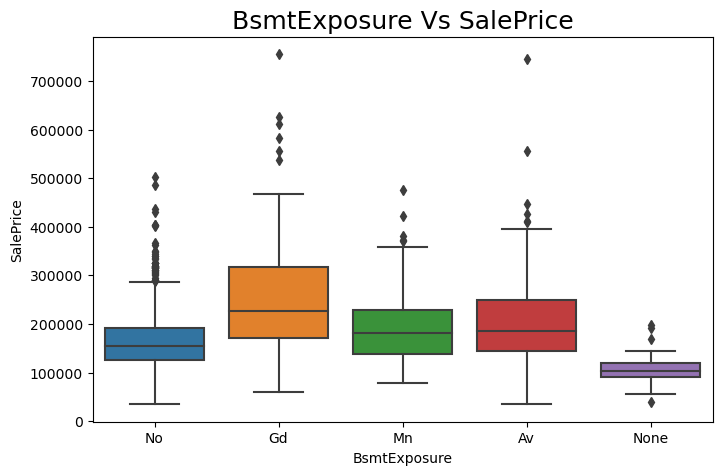

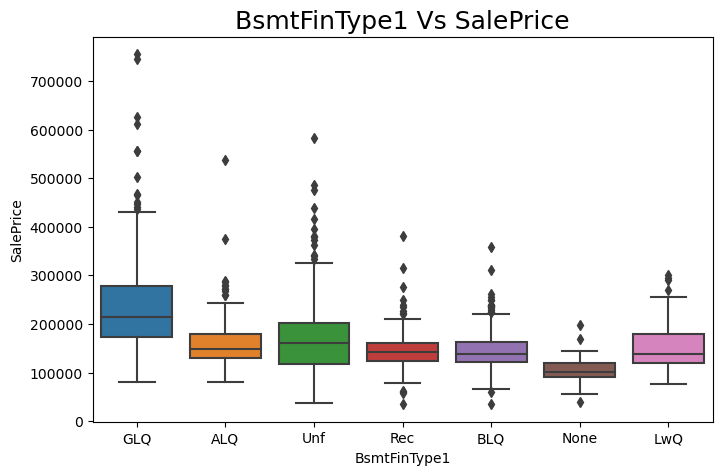

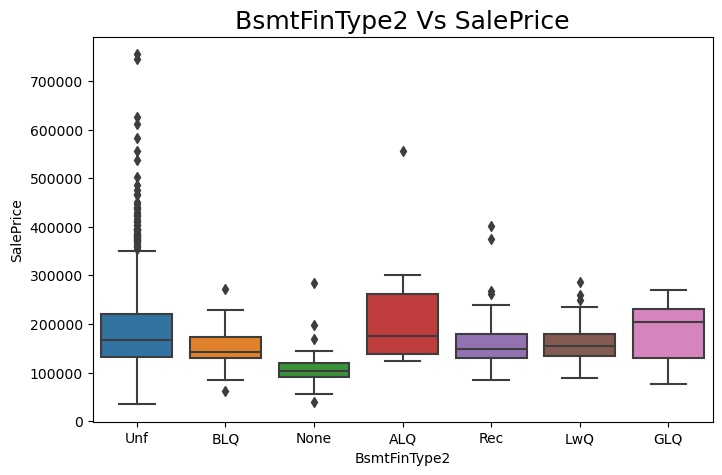

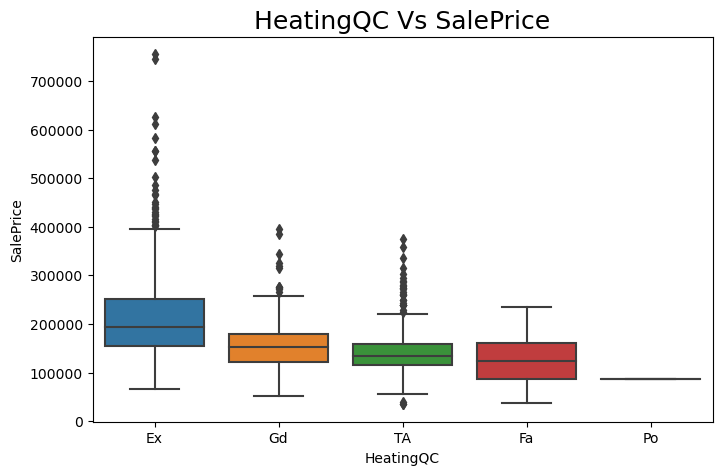

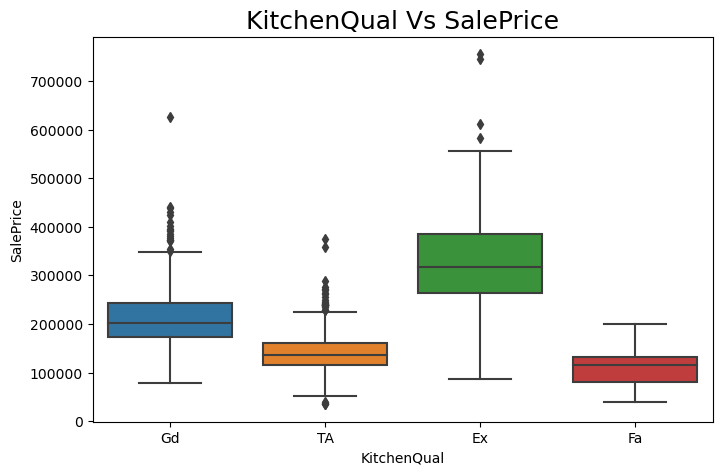

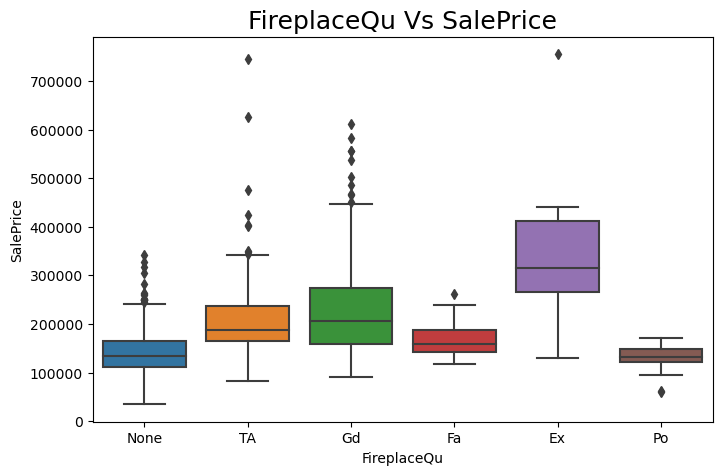

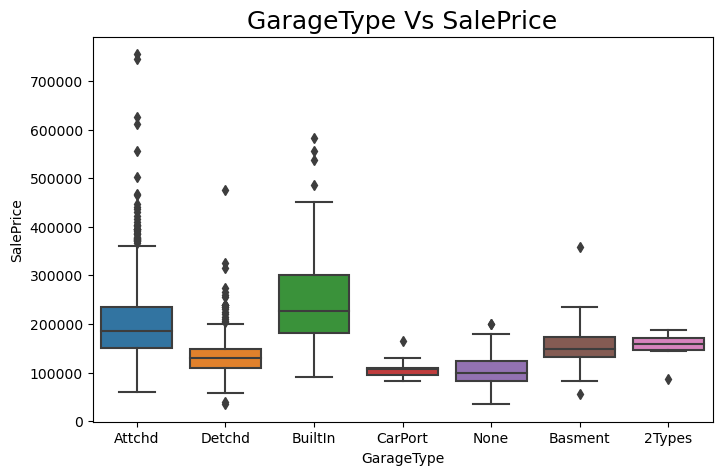

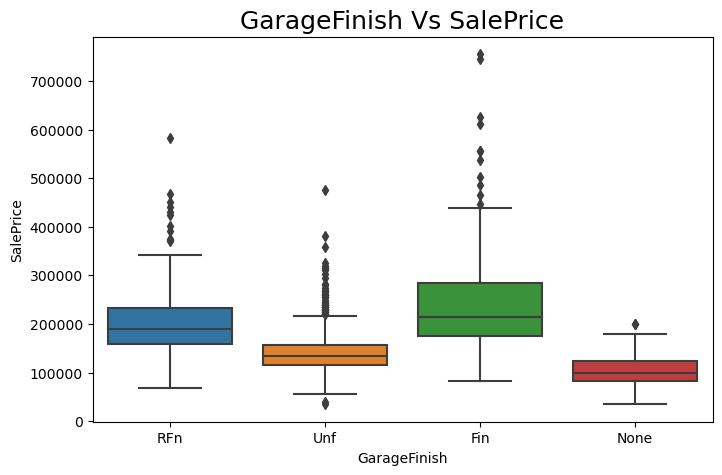

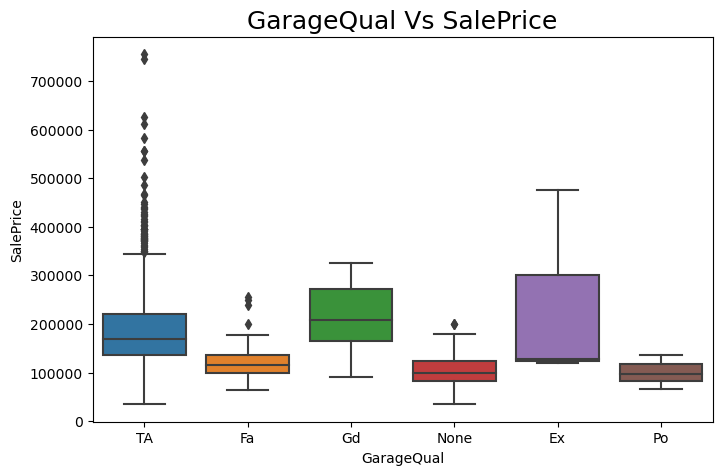

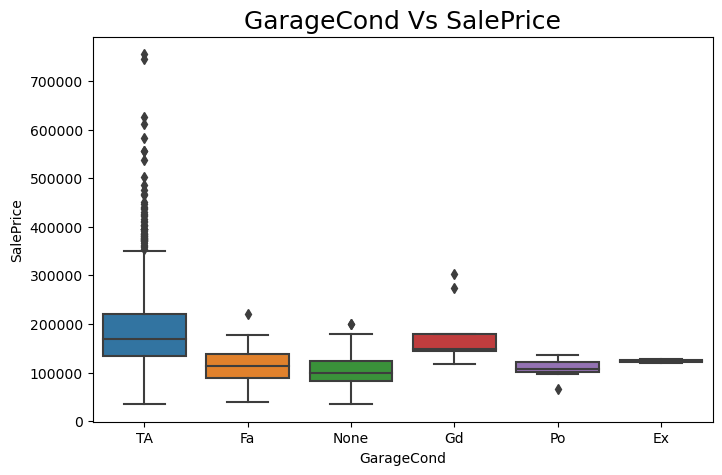

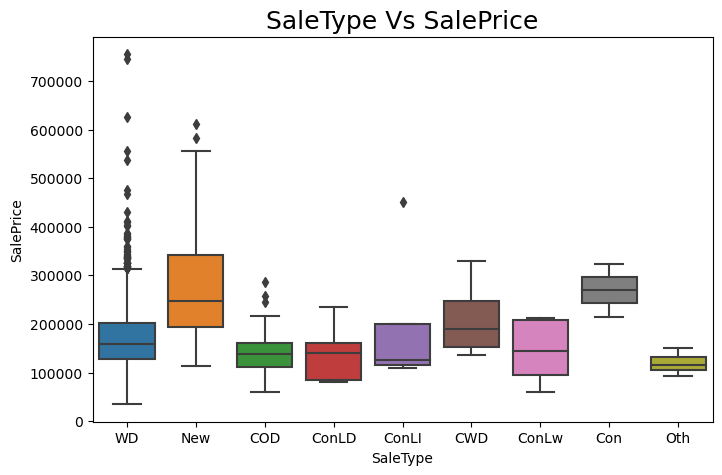

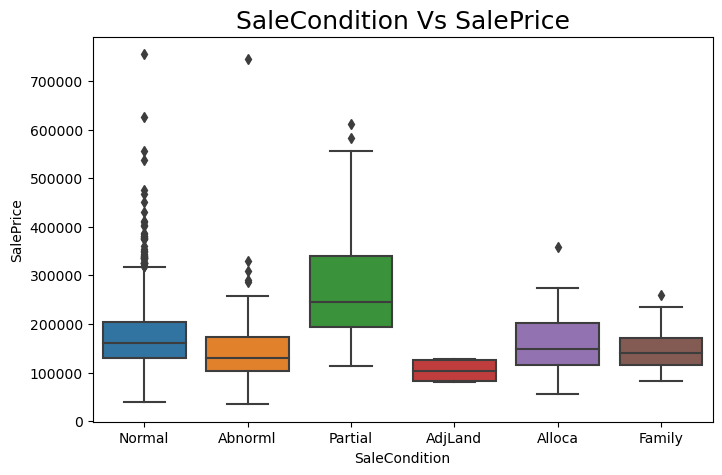

In [29]:
## Visualizing categorical columns vs SalesPrice using box plots
for col in cat_cols.columns:
    plt.figure(figsize=(8,5))
    plt.title(col + ' Vs SalePrice', fontdict={'fontsize': 18})
    sns.boxplot(x=col, y='SalePrice', data=housing_df)
    plt.show()
    

#### 🔎**Observations**:
- SalePrice is more when the overall condition and quality is more than 9
- SalePrice is more when External Condition, External Quality, Basement Condition, Basement Quality, Kitchen Quality, Fireplace quality, Garage Quality, Garage Condition, is Excellent.
- SalePrice is more for Newly constructed homes

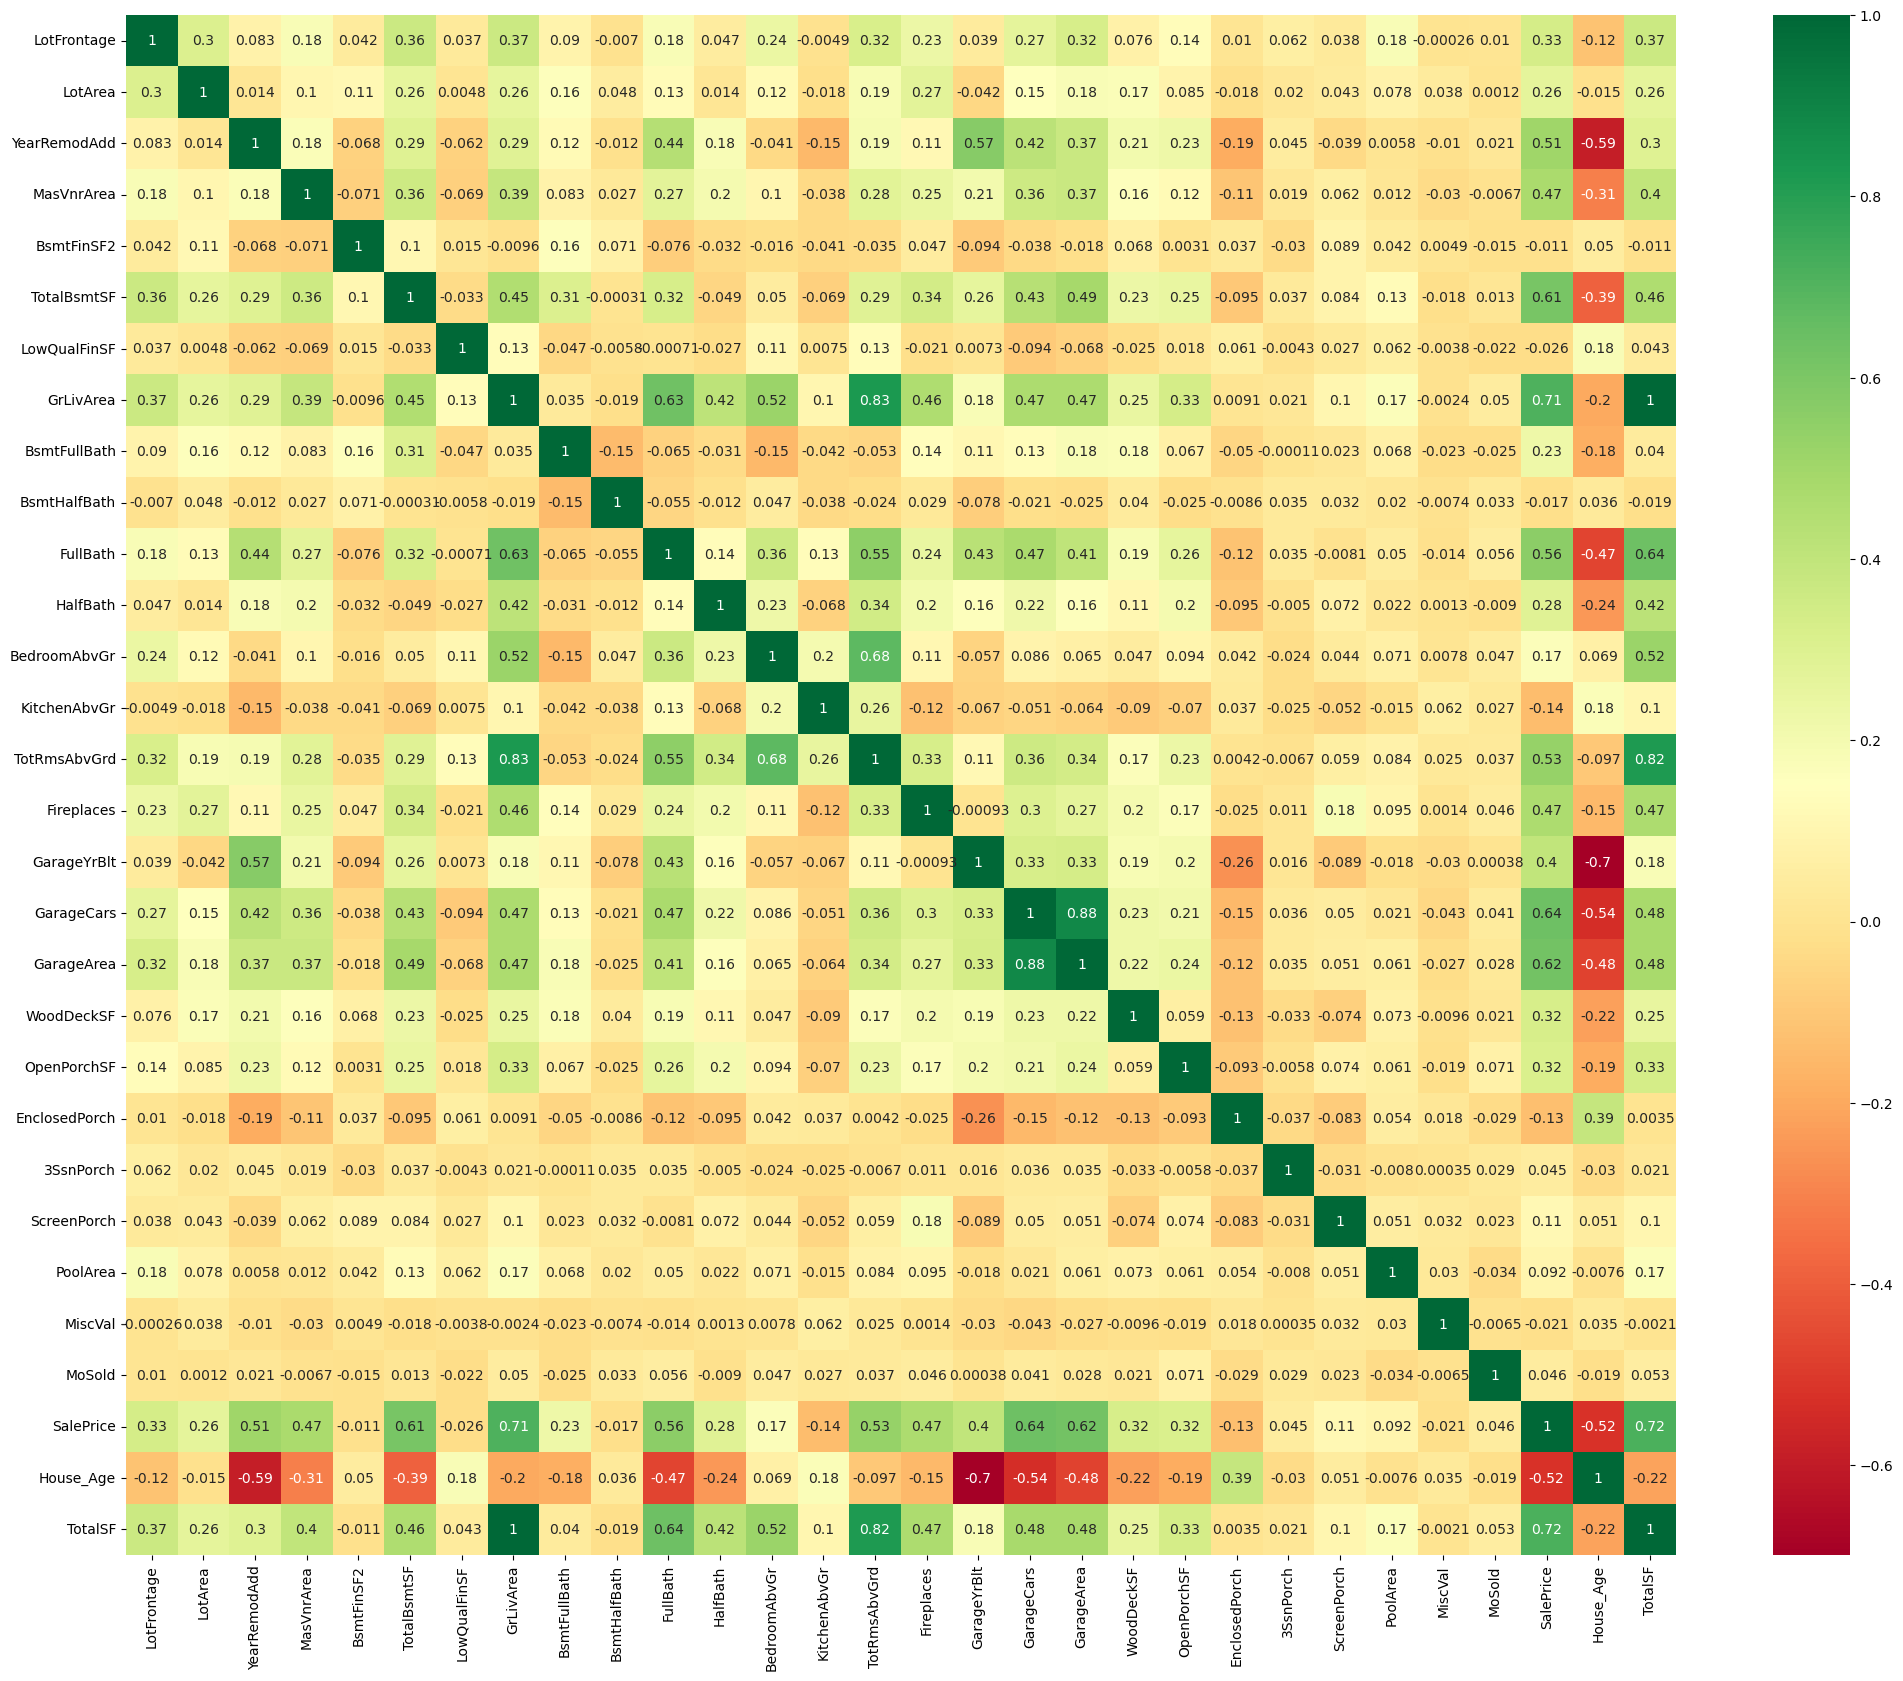

In [30]:
# Correlation Matrix
plt.figure(figsize=(25,20))
sns.heatmap(num_cols.corr(), annot=True, cmap='RdYlGn');

#### 🔎 **Observations:**
- Sale price is highly positively correlated with GrLivArea & TotalSF.
- Sale price is positively correlated with TotalBsmtSF, FullBath, TotRmsAbvGrd, GarageCars, GarageArea
- Sale price is not highly negatively correlated with other variables.
- Yearbuilt House Age are highly negetively correlated
- TotRmsAbvGrd are positively correlated with TotalSF and GrLivArea
- GarageArea GarageCars are positively correlated

# Outlier Treatment 

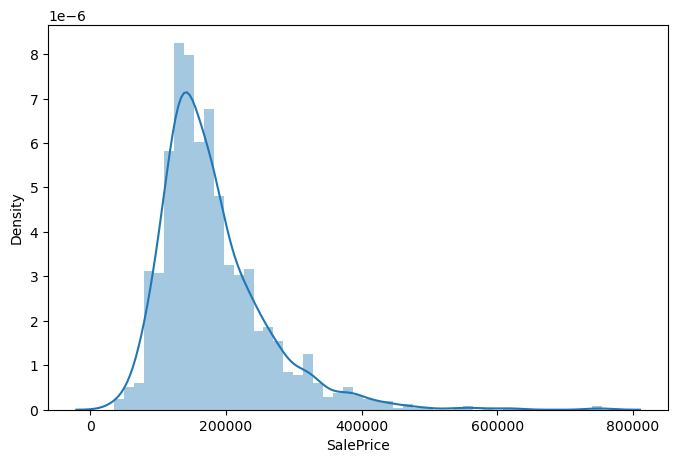

In [31]:
## 'SalePrice' distribution
plt.figure(figsize=[8,5])
sns.distplot(housing_df['SalePrice']);

<Axes: xlabel='SalePrice'>

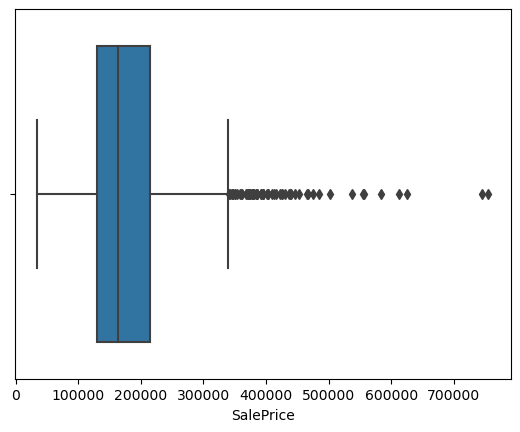

In [32]:
# Checking the outliers 

sns.boxplot(x='SalePrice', data=housing_df)

In [33]:
# Columns showing linear relation with SalePrice
cols = ['TotalSF','GrLivArea','TotalBsmtSF']

In [34]:
# Removing values above 95th Quantile
for col in cols:
    housing_df = housing_df[housing_df[col] <= housing_df[col].quantile(0.95)]

In [35]:
housing_df.shape

(1252, 62)

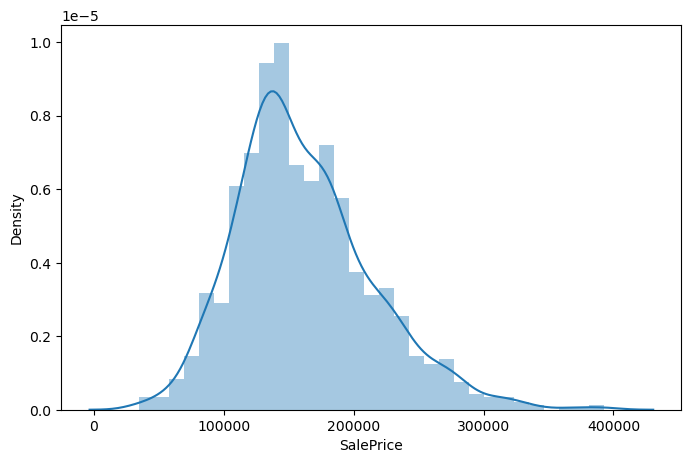

In [36]:
## 'SalePrice' distribution
plt.figure(figsize=[8,5])
sns.distplot(housing_df['SalePrice']);

<Axes: xlabel='SalePrice'>

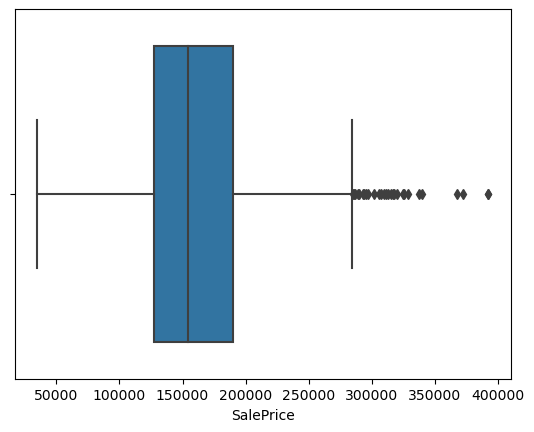

In [37]:
# Checking the outliers 

sns.boxplot(x='SalePrice', data=housing_df)

Now we can see that the distribution is a normal curve. 

# Data Preprocessing
### Creating Dummies

In [38]:
#Categorical columns
housing_df.select_dtypes(include='object').columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition'],
      dtype='object')

In [39]:
# Convert categorical value into Dummy variable
housing_df=pd.get_dummies(housing_df,drop_first=True)
housing_df.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF2  TotalBsmtSF  \
0         65.0     8450          2003       196.0           0          856   
1         80.0     9600          1976         0.0           0         1262   
2         68.0    11250          2002       162.0           0          920   
3         60.0     9550          1970         0.0           0          756   
5         85.0    14115          1995         0.0           0          796   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  ...  SaleType_ConLI  \
0             0       1710             1             0  ...           False   
1             0       1262             0             1  ...           False   
2             0       1786             1             0  ...           False   
3             0       1717             1             0  ...           False   
5             0       1362             1             0  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
5           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
5                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
5                  True                  False  

[5 rows x 233 columns]

In [40]:
housing_df = housing_df.astype(int)

In [41]:
housing_df.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF2  TotalBsmtSF  \
0           65     8450          2003         196           0          856   
1           80     9600          1976           0           0         1262   
2           68    11250          2002         162           0          920   
3           60     9550          1970           0           0          756   
5           85    14115          1995           0           0          796   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  ...  SaleType_ConLI  \
0             0       1710             1             0  ...               0   
1             0       1262             0             1  ...               0   
2             0       1786             1             0  ...               0   
3             0       1717             1             0  ...               0   
5             0       1362             1             0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
5               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
5                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
5                     1                      0  

[5 rows x 233 columns]

In [42]:
housing_df.shape

(1252, 233)

### Train-Test Split 

In [43]:
#Split the data into train and test
housing_df.shape

(1252, 233)

In [44]:
df_train, df_test = train_test_split(housing_df, test_size=0.3, random_state = 42)

In [45]:
df_train.shape

(876, 233)

In [46]:
df_test.shape

(376, 233)

### Scaling Numerical Columns

In [47]:
# Numerical Columns
num_cols = ['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2',
       'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold','House_Age', 'TotalSF','SalePrice']

In [48]:
# Scaling using MinMax
scaler = MinMaxScaler()

In [49]:
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [50]:
df_train.describe()

LotFrontage     LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF2  \
count   876.000000  876.000000    876.000000  876.000000  876.000000   
mean      0.316824    0.051181      0.551655    0.074400    0.040542   
std       0.125477    0.043064      0.351759    0.132758    0.137977   
min       0.000000    0.000000      0.000000    0.000000    0.000000   
25%       0.265306    0.036331      0.233333    0.000000    0.000000   
50%       0.326531    0.048393      0.675000    0.000000    0.000000   
75%       0.367347    0.060445      0.883333    0.112225    0.000000   
max       1.000000    1.000000      1.000000    1.000000    1.000000   

       TotalBsmtSF  LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath  ...  \
count   876.000000    876.000000  876.000000    876.000000    876.000000  ...   
mean      0.576553      0.008116    0.529100      0.194635      0.031963  ...   
std       0.197388      0.076988    0.212338      0.250861      0.126965  ...   
min       0.000000      0.000000    0.000000      0.000000      0.000000  ...   
25%       0.461257      0.000000    0.362345      0.000000      0.000000  ...   
50%       0.556725      0.000000    0.523683      0.000000      0.000000  ...   
75%       0.706433      0.000000    0.687389      0.500000      0.000000  ...   
max       1.000000      1.000000    1.000000      1.000000      1.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      876.000000      876.000000    876.000000    876.000000   
mean         0.001142        0.002283      0.068493      0.003425   
std          0.033787        0.047755      0.252735      0.058454   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   876.000000             876.000000            876.000000   
mean      0.883562               0.003425              0.006849   
std       0.320933               0.058454              0.082524   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            876.000000            876.000000             876.000000  
mean               0.014840              0.829909               0.070776  
std                0.120982              0.375928               0.256597  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 233 columns]

In [51]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test 

# Model Building
### 1. Linear Regressions Model using RFE

In [52]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=25)             
rfe = rfe.fit(X_train, y_train)

In [53]:
# Ranking for Features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 97),
 ('LotArea', True, 1),
 ('YearRemodAdd', False, 143),
 ('MasVnrArea', False, 188),
 ('BsmtFinSF2', False, 121),
 ('TotalBsmtSF', True, 1),
 ('LowQualFinSF', False, 23),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 45),
 ('BsmtHalfBath', False, 174),
 ('FullBath', False, 104),
 ('HalfBath', False, 125),
 ('BedroomAbvGr', False, 69),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 95),
 ('Fireplaces', False, 84),
 ('GarageYrBlt', False, 67),
 ('GarageCars', False, 42),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 103),
 ('OpenPorchSF', False, 113),
 ('EnclosedPorch', False, 96),
 ('3SsnPorch', False, 100),
 ('ScreenPorch', False, 72),
 ('PoolArea', False, 88),
 ('MiscVal', False, 62),
 ('MoSold', False, 175),
 ('House_Age', True, 1),
 ('TotalSF', True, 1),
 ('MSSubClass_30', False, 163),
 ('MSSubClass_40', False, 164),
 ('MSSubClass_45', False, 112),
 ('MSSubClass_50', False, 162),
 ('MSSubClass_60', False, 122),
 ('MSSubClass_70', False, 161),


In [54]:
# Selected Features
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea',
       'House_Age', 'TotalSF', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Condition1_RRAe',
       'OverallQual_8', 'OverallQual_9', 'OverallCond_2', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Po', 'BsmtCond_Po',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageQual_Po'],
      dtype='object')

In [55]:
# Features not selected
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=207)

In [56]:
X_train_rfe = X_train[col]
lm1 = lm.fit(X_train_rfe, y_train)

In [57]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

0.2535456013904952
[ 0.34594182  0.13097557  0.07316609 -0.1842873   0.11810923 -0.14563665
  0.1835852   0.15186332  0.11828711  0.13566997  0.11957419  0.08966376
 -0.06939123  0.07332139  0.11436554  0.10868719 -0.14275563 -0.10880843
 -0.12133908 -0.20041051 -0.11169237 -0.11372385 -0.07178365 -0.10587752
 -0.11169237]


In [58]:
# r2score,RSS and MSE
y_pred_train_lr = rfe.predict(X_train)
y_pred_test_lr = rfe.predict(X_test)

lr_metric = []
r2_train_lr = r2_score(y_train, y_pred_train_lr)
print('R2 Score of Train Set:', r2_train_lr)
lr_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lr)
print('R2 Score of Test Set:',r2_test_lr)
lr_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lr))
print('RSS of Train Set:',rss1_lr)
lr_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lr))
print('RSS of Test Set:',rss2_lr)
lr_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
print('MSE of Train Set:',mse_train_lr)
lr_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
print('MSE Test Set:',mse_test_lr)
lr_metric.append(mse_test_lr**0.5)

R2 Score of Train Set: 0.8576872961588515
R2 Score of Test Set: 0.8097187336183747
RSS of Train Set: 2.782286526257103
RSS of Test Set: 1.5014819366039935
MSE of Train Set: 0.003176126171526373
MSE Test Set: 0.003993303022882961


### 2. Ridge Regression Model

In [59]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 4.0}
-0.03598302940685278


In [61]:
alpha = 4.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02715642,  0.03991849,  0.02597916,  0.01542419,  0.01780017,
        0.06805903,  0.00202804,  0.09477872,  0.02875917,  0.00116864,
        0.0288463 ,  0.01845916, -0.00541343, -0.02188651,  0.02243273,
        0.02666981,  0.02369385,  0.03654166,  0.0420154 ,  0.02151369,
        0.01817343,  0.00850457,  0.00991676,  0.03222778,  0.00339312,
        0.00659716,  0.00492977, -0.04792081,  0.09414474, -0.01154258,
        0.00621106,  0.00473316,  0.006101  ,  0.01642751,  0.01638981,
       -0.00378473, -0.00735256, -0.0200562 , -0.01860443, -0.01480972,
       -0.02434456, -0.0078254 , -0.004766  ,  0.03160804,  0.01885105,
        0.03133273,  0.01175377,  0.01161902,  0.00375876,  0.00231835,
        0.0034819 ,  0.01088886, -0.00547952,  0.02172539, -0.01512417,
       -0.00266366, -0.00571394,  0.        ,  0.00773649,  0.009183  ,
        0.0213815 , -0.00597576,  0.04606103, -0.02634597, -0.01395185,
       -0.01816203, -0.03139662, -0.01951151, -0.01625864,  0.00

In [62]:
# R2 score, RSS and MSE
y_pred_train_rdg = ridge.predict(X_train)
y_pred_test_rdg = ridge.predict(X_test)

rdg_metric = []
r2_train_rdg= r2_score(y_train, y_pred_train_rdg)
print('R2 Score of Train Set:',r2_train_rdg)
rdg_metric.append(r2_train_rdg)

r2_test_rdg = r2_score(y_test, y_pred_test_rdg)
print('R2 Score of Test Set:',r2_test_rdg)
rdg_metric.append(r2_test_rdg)

rss1_rdg = np.sum(np.square(y_train - y_pred_train_rdg))
print('RSS Train Set:',rss1_rdg)
rdg_metric.append(rss1_rdg)

rss2_rdg = np.sum(np.square(y_test - y_pred_test_rdg))
print('RSS Test Set:',rss2_rdg)
rdg_metric.append(rss2_rdg)

mse_train_rdg = mean_squared_error(y_train, y_pred_train_rdg)
print('MSE Train Set:', mse_train_rdg)
rdg_metric.append(mse_train_rdg**0.5)

mse_test_rdg = mean_squared_error(y_test, y_pred_test_rdg)
print('MSE Test Set:',mse_test_rdg)
rdg_metric.append(mse_test_rdg**0.5)

R2 Score of Train Set: 0.9236698284050657
R2 Score of Test Set: 0.8839934206438362
RSS Train Set: 1.4922940977393793
RSS Test Set: 0.9153911298927403
MSE Train Set: 0.0017035320750449535
MSE Test Set: 0.0024345508773743092


In [63]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridge_model_cv.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.021069      0.006806         0.006969        0.001476      0.0001   
1        0.034331      0.014630         0.008041        0.000938       0.001   
2        0.017449      0.005651         0.016369        0.016529        0.01   
3        0.019721      0.006653         0.017297        0.012624        0.05   
4        0.023927      0.011674         0.014665        0.017064         0.1   
5        0.019911      0.005229         0.007545        0.000697         0.2   
6        0.016926      0.004047         0.018643        0.024740         0.3   
7        0.033737      0.023139         0.013531        0.007914         0.4   
8        0.020656      0.006433         0.006819        0.000287         0.5   
9        0.018946      0.006945         0.007162        0.002013         0.6   
10       0.029485      0.015457         0.010099        0.004226         0.7   
11       0.031659      0.019631         0.009093        0.002749         0.8   
12       0.017065      0.003830         0.015974        0.018834         0.9   
13       0.021941      0.010726         0.020691        0.028318         1.0   
14       0.019492      0.004042         0.006834        0.000478         2.0   
15       0.021201      0.004066         0.007317        0.000400         3.0   
16       0.017054      0.004812         0.006734        0.000330         4.0   
17       0.019445      0.006257         0.007307        0.001360         5.0   
18       0.014361      0.000512         0.006460        0.000897         6.0   
19       0.015021      0.000431         0.006823        0.000217         7.0   
20       0.015312      0.001396         0.006700        0.000609         8.0   
21       0.015109      0.000748         0.006415        0.000390         9.0   
22       0.015533      0.001014         0.006583        0.000517        10.0   
23       0.015728      0.000321         0.006113        0.000192          20   
24       0.015153      0.000628         0.006198        0.000406          50   
25       0.015782      0.000733         0.007781        0.001160         100   
26       0.014926      0.000219         0.007018        0.000015         500   
27       0.015020      0.000744         0.006571        0.000321        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.040419          -0.043098   
1    {'alpha': 0.001}          -0.040422          -0.043088   
2     {'alpha': 0.01}          -0.040386          -0.042998   
3     {'alpha': 0.05}          -0.039990          -0.042726   
4      {'alpha': 0.1}          -0.039462          -0.042459   
5      {'alpha': 0.2}          -0.038884          -0.042153   
6      {'alpha': 0.3}          -0.038553          -0.041967   
7      {'alpha': 0.4}          -0.038349          -0.041822   
8      {'alpha': 0.5}          -0.038189          -0.041685   
9      {'alpha': 0.6}          -0.038076          -0.041573   
10     {'alpha': 0.7}          -0.037990          -0.041474   
11     {'alpha': 0.8}          -0.037911          -0.041387   
12     {'alpha': 0.9}          -0.037836          -0.041306   
13     {'alpha': 1.0}          -0.037766          -0.041237   
14     {'alpha': 2.0}          -0.037289          -0.041113   
15     {'alpha': 3.0}          -0.037057          -0.041226   
16     {'alpha': 4.0}          -0.037022          -0.041427   
17     {'alpha': 5.0}          -0.037091          -0.041672   
18     {'alpha': 6.0}          -0.037295          -0.041913   
19     {'alpha': 7.0}          -0.037512          -0.042169   
20     {'alpha': 8.0}          -0.037726          -0.042431   
21     {'alpha': 9.0}          -0.037923          -0.042675   
22    {'alpha': 10.0}          -0.038125          -0.042909   
23      {'alpha': 20}          -0.039934          -0.045088   
24      {'alpha': 50}          -0.043463          -0.049456   
25     {'alpha': 100}          -0.047542     

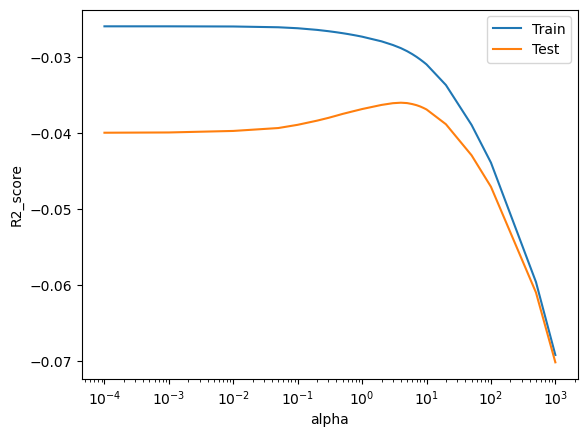

In [64]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

🔎 We can clearly see that 4.0 is the optimum value of Alpha for Ridge Regression.

#### 2.1 Residual Analysis

Text(0.5, 9.444444444444438, 'Errors')

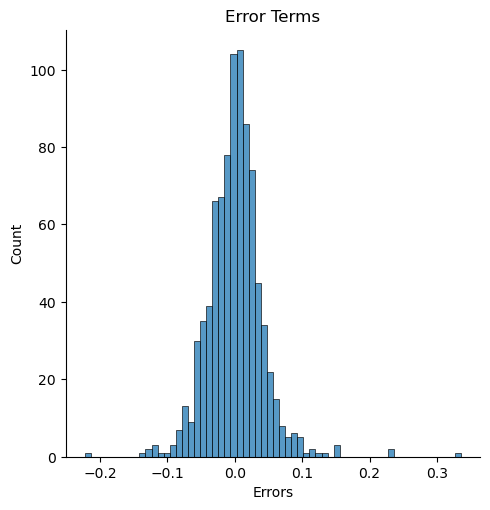

In [65]:
# Plotting a histogram of the error terms to verify that it is normally dustributed.
sns.displot(y_train - y_pred_train_rdg)
plt.title('Error Terms')
plt.xlabel('Errors')

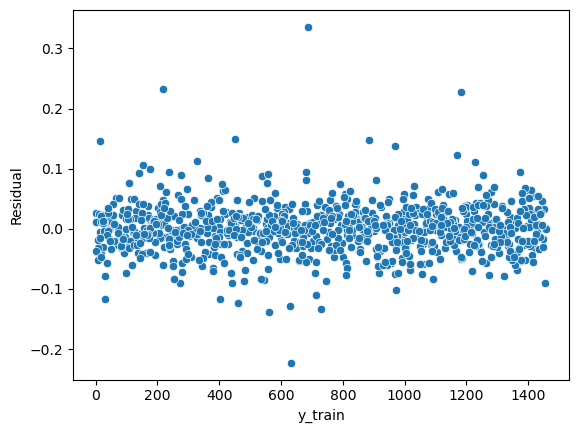

In [66]:
# Homoscedacity

residual = y_train - y_pred_train_rdg
sns.scatterplot(residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('y_train')
plt.ylabel('Residual')
plt.show()

### 3. Lasso Regression

In [67]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.03614860765553027


In [69]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [70]:
lasso.coef_

array([ 0.02609237,  0.12816907,  0.02002247,  0.        ,  0.00902194,
        0.08515026, -0.        ,  0.14174996,  0.03099102,  0.        ,
        0.01677247,  0.01301815, -0.        , -0.04824704,  0.        ,
        0.01980357,  0.02533531,  0.03672271,  0.04205932,  0.02081482,
        0.01079041,  0.00768034,  0.        ,  0.03255237,  0.        ,
        0.        ,  0.00277103, -0.09100061,  0.07850032, -0.00345808,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.00315254, -0.01527331, -0.03347762, -0.01301575,
       -0.04173466, -0.        , -0.00107289,  0.04057131,  0.01595729,
        0.02713972,  0.00693382,  0.0050847 ,  0.        ,  0.00262533,
       -0.        ,  0.00227286, -0.00437486,  0.0207541 , -0.00965562,
       -0.        , -0.00336474,  0.        ,  0.00526211,  0.02137832,
        0.0248765 ,  0.        ,  0.06175476, -0.01899086, -0.00321187,
       -0.00260609, -0.02654528, -0.01304189, -0.00727707,  0.01

In [71]:
# R2 score, RSS and RMSE

y_pred_train_ls = lasso.predict(X_train)
y_pred_test_ls = lasso.predict(X_test)

ls_metric = []
r2_train_ls= r2_score(y_train, y_pred_train_ls)
print('R2 Score of Train Set:',r2_train_ls)
ls_metric.append(r2_train_ls)

r2_test_ls = r2_score(y_test, y_pred_test_ls)
print('R2 Score of Test Set:',r2_test_ls)
ls_metric.append(r2_test_ls)

rss1_ls = np.sum(np.square(y_train - y_pred_train_ls))
print('RSS Train Set:',rss1_ls)
ls_metric.append(rss1_ls)

rss2_ls = np.sum(np.square(y_test - y_pred_test_ls))
print('RSS Test Set:',rss2_ls)
ls_metric.append(rss2_ls)

mse_train_ls = mean_squared_error(y_train, y_pred_train_ls)
print('MSE Train Set:', mse_train_ls)
ls_metric.append(mse_train_ls**0.5)

mse_test_ls = mean_squared_error(y_test, y_pred_test_ls)
print('MSE Test Set:',mse_test_ls)
ls_metric.append(mse_test_ls**0.5)

R2 Score of Train Set: 0.9246625957422231
R2 Score of Test Set: 0.8864569489333193
RSS Train Set: 1.472884985893932
RSS Test Set: 0.8959517846681135
MSE Train Set: 0.0016813755546734382
MSE Test Set: 0.0023828504911386


In [72]:
## Create a dataframe of ridge cross validation results
lassoCV_results= pd.DataFrame(lasso_model_cv.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.095700      0.005458         0.007945        0.000835      0.0001   
1        0.054876      0.002972         0.006748        0.000454       0.001   
2        0.018472      0.002762         0.007139        0.000449        0.01   
3        0.015264      0.001176         0.007015        0.000952        0.05   
4        0.014380      0.000473         0.007005        0.000522         0.1   
5        0.014497      0.000457         0.007112        0.000213         0.2   
6        0.016619      0.002376         0.007167        0.000806         0.3   
7        0.014621      0.001210         0.006745        0.000395         0.4   
8        0.013982      0.000522         0.006837        0.000297         0.5   
9        0.014643      0.000778         0.006822        0.000412         0.6   
10       0.014501      0.000659         0.007021        0.000644         0.7   
11       0.014314      0.000545         0.007564        0.001062         0.8   
12       0.015225      0.001142         0.006725        0.000363         0.9   
13       0.014775      0.001145         0.007178        0.001029         1.0   
14       0.013850      0.000392         0.006895        0.000490         2.0   
15       0.014328      0.000424         0.006408        0.000497         3.0   
16       0.014299      0.000748         0.006385        0.000491         4.0   
17       0.014437      0.001001         0.006733        0.000415         5.0   
18       0.013800      0.000394         0.006533        0.000453         6.0   
19       0.014872      0.000791         0.006886        0.000598         7.0   
20       0.014264      0.000444         0.006732        0.000400         8.0   
21       0.015146      0.000982         0.006928        0.000609         9.0   
22       0.015809      0.002994         0.006512        0.000886        10.0   
23       0.015335      0.001342         0.006790        0.000460          20   
24       0.014826      0.000267         0.007075        0.000599          50   
25       0.014349      0.000493         0.007021        0.000221         100   
26       0.014466      0.000650         0.006655        0.000489         500   
27       0.013689      0.000558         0.006798        0.000397        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.037435          -0.040681   
1    {'alpha': 0.001}          -0.043551          -0.046439   
2     {'alpha': 0.01}          -0.066881          -0.079001   
3     {'alpha': 0.05}          -0.115339          -0.126951   
4      {'alpha': 0.1}          -0.115339          -0.126951   
5      {'alpha': 0.2}          -0.115339          -0.126951   
6      {'alpha': 0.3}          -0.115339          -0.126951   
7      {'alpha': 0.4}          -0.115339          -0.126951   
8      {'alpha': 0.5}          -0.115339          -0.126951   
9      {'alpha': 0.6}          -0.115339          -0.126951   
10     {'alpha': 0.7}          -0.115339          -0.126951   
11     {'alpha': 0.8}          -0.115339          -0.126951   
12     {'alpha': 0.9}          -0.115339          -0.126951   
13     {'alpha': 1.0}          -0.115339          -0.126951   
14     {'alpha': 2.0}          -0.115339          -0.126951   
15     {'alpha': 3.0}          -0.115339          -0.126951   
16     {'alpha': 4.0}          -0.115339          -0.126951   
17     {'alpha': 5.0}          -0.115339          -0.126951   
18     {'alpha': 6.0}          -0.115339          -0.126951   
19     {'alpha': 7.0}          -0.115339          -0.126951   
20     {'alpha': 8.0}          -0.115339          -0.126951   
21     {'alpha': 9.0}          -0.115339          -0.126951   
22    {'alpha': 10.0}          -0.115339          -0.126951   
23      {'alpha': 20}          -0.115339          -0.126951   
24      {'alpha': 50}          -0.115339          -0.126951   
25     {'alpha': 100}          -0.115339     

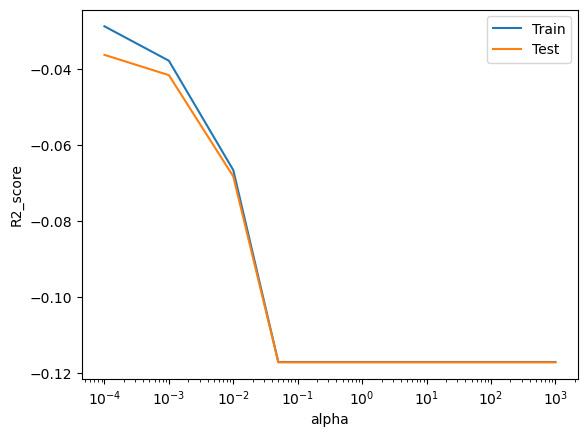

In [73]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

#### 3.1 Residual Analysis

Text(0.5, 9.444444444444438, 'Errors')

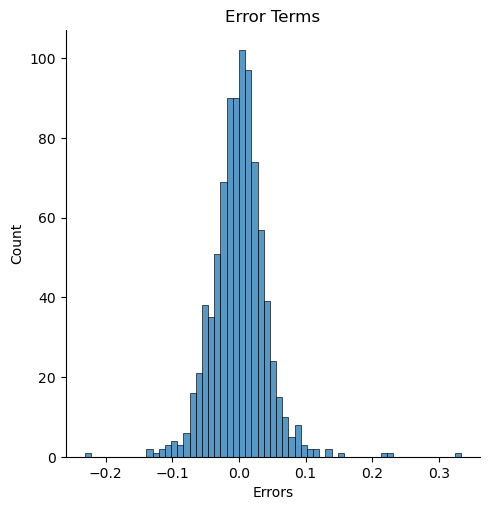

In [74]:
# Plotting a histogram of the error terms to verify that it is normally dustributed.
sns.displot(y_train - y_pred_train_ls)
plt.title('Error Terms')
plt.xlabel('Errors')

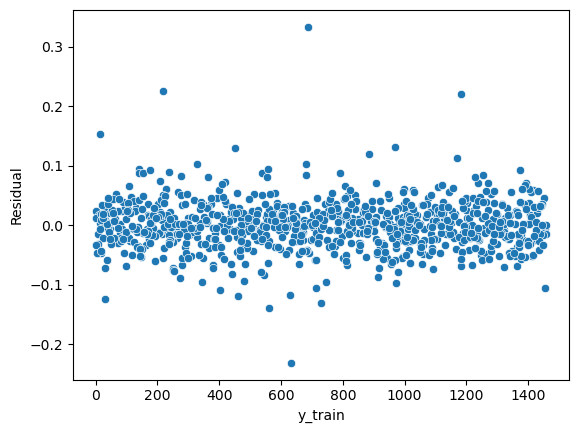

In [75]:
# Homoscedacity

residual = y_train - y_pred_train_ls
sns.scatterplot(residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('y_train')
plt.ylabel('Residual')
plt.show()

## MODEL COMPARISON

In [76]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                        'RMSE (Train)', 'RMSE (Test)'],
            'Linear Regression': lr_metric,
            'Ridge Regression' : rdg_metric,
            'Lasso Regression' : ls_metric
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Linear Regression','Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Linear Regression  Ridge Regression  Lasso Regression
Metric                                                                 
R2 Score (Train)           0.857687          0.923670          0.924663
R2 Score (Test)            0.809719          0.883993          0.886457
RSS (Train)                2.782287          1.492294          1.472885
RSS (Test)                 1.501482          0.915391          0.895952
RMSE (Train)               0.056357          0.041274          0.041005
RMSE (Test)                0.063193          0.049341          0.048814

In [77]:
## Beta Dataframe
betas = pd.DataFrame(index=X_train.columns)
betas['Ridge'] = ridge.coef_
betas['Ridge'] = round(betas['Ridge'],2)
betas['Lasso'] = lasso.coef_
betas['Lasso'] = round(betas['Lasso'],2)
betas

Ridge  Lasso
LotFrontage             0.03   0.03
LotArea                 0.04   0.13
YearRemodAdd            0.03   0.02
MasVnrArea              0.02   0.00
BsmtFinSF2              0.02   0.01
...                      ...    ...
SaleCondition_AdjLand   0.01   0.01
SaleCondition_Alloca   -0.01  -0.00
SaleCondition_Family   -0.01  -0.00
SaleCondition_Normal    0.02   0.02
SaleCondition_Partial   0.03   0.05

[232 rows x 2 columns]

In [78]:
# Top 10 Features for Ridge
betas['Ridge'].sort_values(ascending=False)[:10]

TotalSF                 0.09
GrLivArea               0.09
TotalBsmtSF             0.07
OverallQual_9           0.07
Neighborhood_Crawfor    0.05
OverallQual_8           0.05
GarageArea              0.04
LotArea                 0.04
OverallCond_9           0.04
GarageCars              0.04
Name: Ridge, dtype: float64

In [79]:
# Top 10 Features of Lasso
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea                0.14
OverallQual_9            0.13
LotArea                  0.13
TotalBsmtSF              0.09
OverallQual_8            0.08
TotalSF                  0.08
OverallCond_9            0.06
Neighborhood_StoneBr     0.06
Neighborhood_Crawfor     0.06
SaleCondition_Partial    0.05
Name: Lasso, dtype: float64

# Inferences:
  <pre>  
   💡Significant Variables in the Prediction of House Prices:
            - TotalSF
            - GrLivArea
            - TotalBsmtSF
            - OverallQual_9
            - GarageArea
            - Neighborhood_Crawfor
            - OverallQual_8
            - GarageArea 
            - LotArea
            - OverallCond_9
            - GarageCars    
            - Neighborhood_StoneBr
            - SaleCondition_Partial 
            
   💡How well those variables describe the price of a house?
            - For each square feet increase on TotalSF, TotalBsmtSF, LotArea, & GrLivArea, price increases somewhere between 0.06 to 0.14 times. 
            - If the OverallQual Score is 9 for a house, the price increases by 0.07 to 0.13 times.
            - If the Neighbourhood is Crawfor, price increases between 0.5 to 0.6 times.
            - GarageArea and GarageCar increase affects the price hike by 0.4 times
            - If the SalesCondition is Partial, it increases the price by 0.5 times.
            - StoneBr Neighbourhood also increases the price by 0.06 times.
            
   💡Optimal value of lambda for Ridge Regression = 4.0
   
   💡Optimal value of lambda for Lasso = 0.0001
    </pre>  

## SUBJECTIVE QUESTION:

### Question 1
**What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

- Optimal value of lambda for Ridge Regression = 0.4
   
- Optimal value of lambda for Lasso = 0.0001

In [80]:
# When Alpha value of Ridge is 8.0
alpha = 8.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# R2 score, RSS and MSE
y_pred_train_rdg = ridge.predict(X_train)
y_pred_test_rdg = ridge.predict(X_test)

rdg_metric = []
r2_train_rdg= r2_score(y_train, y_pred_train_rdg)
print('R2 Score of Train Set:',r2_train_rdg)
rdg_metric.append(r2_train_rdg)

r2_test_rdg = r2_score(y_test, y_pred_test_rdg)
print('R2 Score of Test Set:',r2_test_rdg)
rdg_metric.append(r2_test_rdg)

rss1_rdg = np.sum(np.square(y_train - y_pred_train_rdg))
print('RSS Train Set:',rss1_rdg)
rdg_metric.append(rss1_rdg)

rss2_rdg = np.sum(np.square(y_test - y_pred_test_rdg))
print('RSS Test Set:',rss2_rdg)
rdg_metric.append(rss2_rdg)

mse_train_rdg = mean_squared_error(y_train, y_pred_train_rdg)
print('MSE Train Set:', mse_train_rdg)
rdg_metric.append(mse_train_rdg**0.5)

mse_test_rdg = mean_squared_error(y_test, y_pred_test_rdg)
print('MSE Test Set:',mse_test_rdg)
rdg_metric.append(mse_test_rdg**0.5)

R2 Score of Train Set: 0.9166676292079805
R2 Score of Test Set: 0.8822215340570798
RSS Train Set: 1.6291906920305328
RSS Test Set: 0.9293728305315727
MSE Train Set: 0.001859806726062252
MSE Test Set: 0.0024717362514137574


In [81]:
# When Alpha value of Lasso is changed to 0.0002
alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

# Lets calculate metrics R2 score, RSS and RMSE

y_pred_train_ls = lasso.predict(X_train)
y_pred_test_ls = lasso.predict(X_test)

ls_metric = []
r2_train_ls= r2_score(y_train, y_pred_train_ls)
print('R2 Score of Train Set:',r2_train_ls)
ls_metric.append(r2_train_ls)

r2_test_ls = r2_score(y_test, y_pred_test_ls)
print('R2 Score of Test Set:',r2_test_ls)
ls_metric.append(r2_test_ls)

rss1_ls = np.sum(np.square(y_train - y_pred_train_ls))
print('RSS Train Set:',rss1_ls)
ls_metric.append(rss1_ls)

rss2_ls = np.sum(np.square(y_test - y_pred_test_ls))
print('RSS Test Set:',rss2_ls)
ls_metric.append(rss2_ls)

mse_train_ls = mean_squared_error(y_train, y_pred_train_ls)
print('MSE Train Set:', mse_train_ls)
ls_metric.append(mse_train_ls**0.5)

mse_test_ls = mean_squared_error(y_test, y_pred_test_ls)
print('MSE Test Set:',mse_test_ls)
ls_metric.append(mse_test_ls**0.5)

R2 Score of Train Set: 0.9161496101623641
R2 Score of Test Set: 0.8829681423368761
RSS Train Set: 1.6393182306975789
RSS Test Set: 0.9234814526405669
MSE Train Set: 0.0018713678432620764
MSE Test Set: 0.002456067693192997


In [82]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                        'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : rdg_metric,
            'Lasso Regression' : ls_metric
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric','Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)          0.916668          0.916150
R2 Score (Test)           0.882222          0.882968
RSS (Train)               1.629191          1.639318
RSS (Test)                0.929373          0.923481
RMSE (Train)              0.043125          0.043259
RMSE (Test)               0.049717          0.049559

##### Ridge Regression:
- We can see the the R2 score for Train has changed from 92.37 to 91.67.
- R2 score of Test changed from 88.4 to 88.22

##### Lasso Regression:
- We can see the the R2 score for Train has changed from 92.47 to 91.62.
- R2 score of Test changed from 88.65 to 88.3.



In [83]:
## Beta Dataframe
betas = pd.DataFrame(index=X_train.columns)
betas['Ridge'] = ridge.coef_
betas['Ridge'] = round(betas['Ridge'],2)
betas['Lasso'] = lasso.coef_
betas['Lasso'] = round(betas['Lasso'],2)
betas

Ridge  Lasso
LotFrontage             0.02   0.02
LotArea                 0.03   0.05
YearRemodAdd            0.03   0.02
MasVnrArea              0.02   0.00
BsmtFinSF2              0.01   0.00
...                      ...    ...
SaleCondition_AdjLand   0.01   0.00
SaleCondition_Alloca   -0.01  -0.00
SaleCondition_Family   -0.01  -0.00
SaleCondition_Normal    0.02   0.02
SaleCondition_Partial   0.03   0.05

[232 rows x 2 columns]

In [84]:
# Top 10 Features for Ridge
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               0.09
TotalSF                 0.08
TotalBsmtSF             0.07
OverallQual_9           0.06
OverallQual_8           0.05
BsmtExposure_Gd         0.04
GarageArea              0.04
Neighborhood_Crawfor    0.04
Neighborhood_StoneBr    0.03
GarageCars              0.03
Name: Ridge, dtype: float64

In [85]:
# Top 10 Features of Lasso
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9            0.14
GrLivArea                0.13
TotalBsmtSF              0.10
TotalSF                  0.09
OverallQual_8            0.08
Neighborhood_Crawfor     0.06
LotArea                  0.05
GarageArea               0.05
SaleCondition_Partial    0.05
OverallCond_9            0.04
Name: Lasso, dtype: float64

### Question 2
**You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?**

R2 scores of Lasso is slightly higher than that of Ridge regression. Additionally, our main intention is to find out the major factors effecting the sales price. Lasso helps in this by performing feature selection process. 

Hence Lasso will be the choice considered. 

### Question 3
**After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

In [93]:
# Dropping the top 5 features from the Train and test set.
cols = ['GrLivArea', 'OverallQual_9', 'LotArea', 'TotalBsmtSF', 'OverallQual_8']
X_train_new = X_train.drop(cols,axis = 1)
X_test_new = X_test.drop(cols,axis = 1)

In [94]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.03678550323786421


In [96]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.0001)

In [98]:
#R2 score, RSS and RMSE

y_pred_train_ls = lasso.predict(X_train_new)
y_pred_test_ls = lasso.predict(X_test_new)

ls_metric = []
r2_train_ls= r2_score(y_train, y_pred_train_ls)
print('R2 Score of Train Set:',r2_train_ls)
ls_metric.append(r2_train_ls)

r2_test_ls = r2_score(y_test, y_pred_test_ls)
print('R2 Score of Test Set:',r2_test_ls)
ls_metric.append(r2_test_ls)

rss1_ls = np.sum(np.square(y_train - y_pred_train_ls))
print('RSS Train Set:',rss1_ls)
ls_metric.append(rss1_ls)

rss2_ls = np.sum(np.square(y_test - y_pred_test_ls))
print('RSS Test Set:',rss2_ls)
ls_metric.append(rss2_ls)

mse_train_ls = mean_squared_error(y_train, y_pred_train_ls)
print('MSE Train Set:', mse_train_ls)
ls_metric.append(mse_train_ls**0.5)

mse_test_ls = mean_squared_error(y_test, y_pred_test_ls)
print('MSE Test Set:',mse_test_ls)
ls_metric.append(mse_test_ls**0.5)

R2 Score of Train Set: 0.9216586680363867
R2 Score of Test Set: 0.8691251749623288
RSS Train Set: 1.5316133169298447
RSS Test Set: 1.0327143049182856
MSE Train Set: 0.0017484170284587269
MSE Test Set: 0.00274658059818693


In [100]:
## Beta Dataframe
betas = pd.DataFrame(index=X_train_new.columns)
betas['Lasso'] = lasso.coef_
betas['Lasso'] = round(betas['Lasso'],2)
betas

Lasso
LotFrontage             0.03
YearRemodAdd            0.02
MasVnrArea              0.01
BsmtFinSF2              0.02
LowQualFinSF            0.04
...                      ...
SaleCondition_AdjLand   0.00
SaleCondition_Alloca   -0.00
SaleCondition_Family   -0.00
SaleCondition_Normal    0.02
SaleCondition_Partial   0.06

[227 rows x 1 columns]

In [101]:
# Top 10 Features of Lasso
betas['Lasso'].sort_values(ascending=False)[:10]

TotalSF                  0.26
Neighborhood_Crawfor     0.06
SaleCondition_Partial    0.06
BsmtExposure_Gd          0.05
OverallCond_9            0.05
Neighborhood_StoneBr     0.05
SaleType_CWD             0.05
GarageArea               0.05
LowQualFinSF             0.04
Neighborhood_ClearCr     0.04
Name: Lasso, dtype: float64

##### Top 5 features now are:
    - TotalSF
    - Neighborhood_Crawfor
    - SaleCondition_Partial
    - BsmtExposure_Gd
    - OverallCond_9

### Question 4
**How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?**

Ensuring that a model is robust and generalisable involves multiple steps during the model development process. 
Some of which are as below:

1. Suffucient and Relevant Data: In order to build a good model, we need to have enough data. This ensures that the we have adequte data for training and testing. Relevant data is also necessary to build an appropriate solution for the problem statement. 

2. Data Preprocessing: This is one of the most important steps in the model building that affects the model accuracy. This involves imputing the null values, changing the datatypes, removing the outliers, etc. 

3. Feature Engineering and Selection: Choosing features that are relevant to the problem and have predictive power in another step. Additionally, we can consider techniques such as regularization to prevent overfitting and improve generalization.

4. Model Evaluation Metrics: Choosing appropriate evaluation metrics that reflect the model performance on unseen data is also significant. Metrics such as accuracy, precision, recall, etc are commonly used for classification tasks, while metrics such as R-squared, root mean squared error (RMSE), and mean absolute error (MAE) are used for regression problems.

5. Hyperparameter Tuning: Optimize the model's hyperparameters using techniques such as grid search or randomized search to find the best combination of hyperparameters that maximize performance on unseen data.

 A model that is robust and generalisable is more likely to perform well on unseen data, leading to more accurate predictions in real-world scenarios. While a model that is overfitted to the training data or lacks generalisation may perform well on the training data but poorly on unseen data, resulting in lower accuracy and reliability in practical applications.A robust and generalisable model is essential for making accurate predictions in real-world scenarios and minimising the risk of performance degradation when deployed in production.